In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from collections import Counter
import plotly.graph_objs as go

In [3]:
data = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


<Figure size 1500x1500 with 0 Axes>

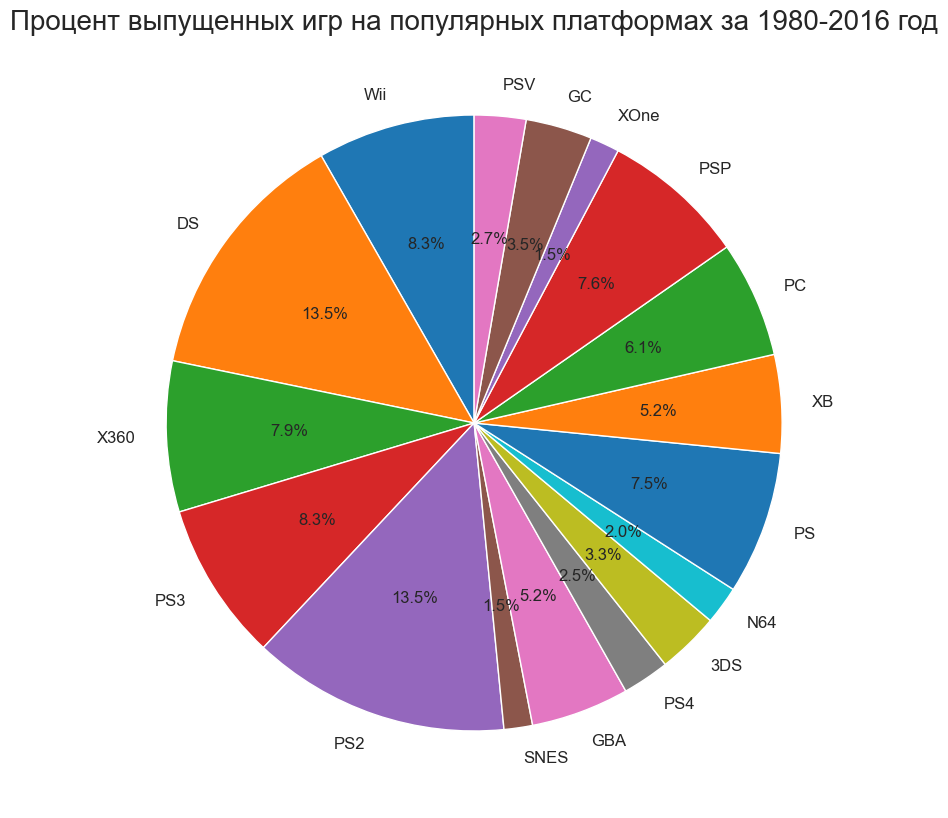

In [4]:
data_pie_temp = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
delete_platform = ["PCFX", "GG", "3DO", "TG16", "WS", "NG", "SCD", "DC", "GEN", "SAT", "2600", "GB", "NES", "WiiU"]
for i in delete_platform:
    data_pie_temp = data_pie_temp[data_pie_temp.Platform != i]

sns.set_style("white")
plt.figure(figsize=(15, 15))
data_pie = Counter(data_pie_temp['Platform'])
labels = data_pie.keys()
sizes = data_pie.values()
plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
plt.title('Процент выпущенных игр на популярных платформах за 1980-2016 год', fontdict={'fontsize':20})
plt.show()

In [5]:
data_heat_temp = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
delete_platform = ["PCFX", "GG", "3DO", "TG16", "WS", "NG", "SCD", "DC", "GEN", "SAT", "2600", "GB", "NES", "WiiU", "N64"]
for i in delete_platform:
    data_heat_temp = data_heat_temp[data_heat_temp.Platform != i]
data_heat_temp = data_heat_temp[data_heat_temp.Year_of_Release > 1999]
data_heat_temp = data_heat_temp[data_heat_temp.Year_of_Release < 2017]
data_heat_temp['Name'] = data_heat_temp['Platform']

In [6]:
data_heat_temp

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,DS,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,PS3,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,X360,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,PSV,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,GBA,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data_heat_temp = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
delete_platform = ["PCFX", "GG", "3DO", "TG16", "WS", "NG", "SCD", "DC", "GEN", "SAT", "2600", "GB", "NES", "WiiU", "N64"]
for i in delete_platform:
    data_heat_temp = data_heat_temp[data_heat_temp.Platform != i]
data_heat_temp = data_heat_temp[data_heat_temp.Year_of_Release > 1999]
data_heat_temp = data_heat_temp[data_heat_temp.Year_of_Release < 2017]
data_heat_temp['Platform'] = data_heat_temp['Name']
sns.set_style("white")
plt.figure(figsize=(20, 10))
platform_genre_sales = data_heat_temp.pivot_table(index='Platform', columns='Name', aggfunc=sum).fillna(0).applymap(float)
ax = sns.heatmap(platform_genre_sales,annot=True,fmt=".1f",linewidth=.5, cbar_kws={'label': "Количество проданных копий игр, млн. шт."})
ax.figure.axes[-1].yaxis.label.set_size(20)
plt.title('Тепловая карта количества проданных копий игр на разных платформах за 2000-2016 года',fontdict={'fontsize':20})
plt.ylabel('Платформа', fontsize=20)
plt.xlabel('Год', fontsize=20)
plt.xticks(rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

C:\Users\v1d3k\AppData\Local\Temp\ipykernel_16288\1997036952.py:10: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  platform_genre_sales = data_heat_temp.pivot_table(index='Platform', columns='Name', aggfunc=sum).fillna(0).applymap(float)


KeyboardInterrupt: 

<Figure size 2000x1000 with 0 Axes>

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]),
 [Text(0, 0.5, '3DS'),
  Text(0, 1.5, 'DS'),
  Text(0, 2.5, 'GBA'),
  Text(0, 3.5, 'GC'),
  Text(0, 4.5, 'PC'),
  Text(0, 5.5, 'PS'),
  Text(0, 6.5, 'PS2'),
  Text(0, 7.5, 'PS3'),
  Text(0, 8.5, 'PS4'),
  Text(0, 9.5, 'PSP'),
  Text(0, 10.5, 'PSV'),
  Text(0, 11.5, 'Wii'),
  Text(0, 12.5, 'X360'),
  Text(0, 13.5, 'XB'),
  Text(0, 14.5, 'XOne')])

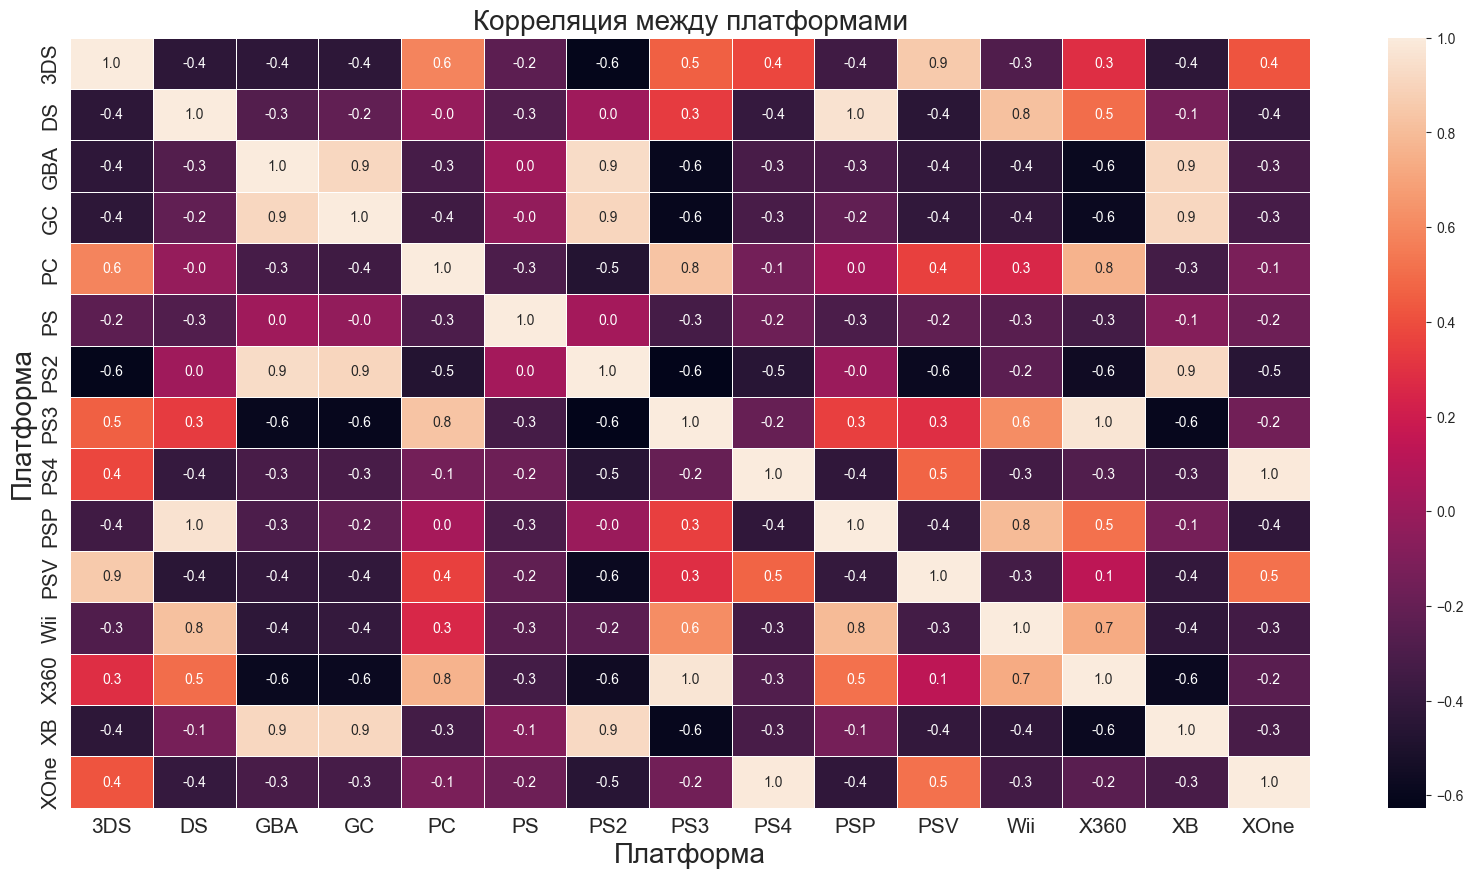

In [39]:
data_heat_temp = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
delete_platform = ["PCFX", "GG", "3DO", "TG16", "WS", "NG", "SCD", "DC", "GEN", "SAT", "2600", "GB", "NES", "WiiU", "N64"]
for i in delete_platform:
    data_heat_temp = data_heat_temp[data_heat_temp.Platform != i]
data_heat_temp = data_heat_temp[data_heat_temp.Year_of_Release > 1999]
data_heat_temp = data_heat_temp[data_heat_temp.Year_of_Release < 2017]
sns.set_style("white")
plt.figure(figsize=(20, 10))
platform_genre_sales = data_heat_temp.pivot_table(index='Year_of_Release', columns='Platform', values='Global_Sales', aggfunc=sum).fillna(0).applymap(float)
ax = sns.heatmap(platform_genre_sales.corr(),annot=True,fmt=".1f",linewidth=.5)
ax.figure.axes[-1].yaxis.label.set_size(20)
plt.title('Корреляция между платформами',fontdict={'fontsize':20})
plt.ylabel('Платформа', fontsize=20)
plt.xlabel('Платформа', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]),
 [Text(0, 0.5, '3DS'),
  Text(0, 1.5, 'DS'),
  Text(0, 2.5, 'GBA'),
  Text(0, 3.5, 'GC'),
  Text(0, 4.5, 'PC'),
  Text(0, 5.5, 'PS'),
  Text(0, 6.5, 'PS2'),
  Text(0, 7.5, 'PS3'),
  Text(0, 8.5, 'PS4'),
  Text(0, 9.5, 'PSP'),
  Text(0, 10.5, 'PSV'),
  Text(0, 11.5, 'Wii'),
  Text(0, 12.5, 'X360'),
  Text(0, 13.5, 'XB'),
  Text(0, 14.5, 'XOne')])

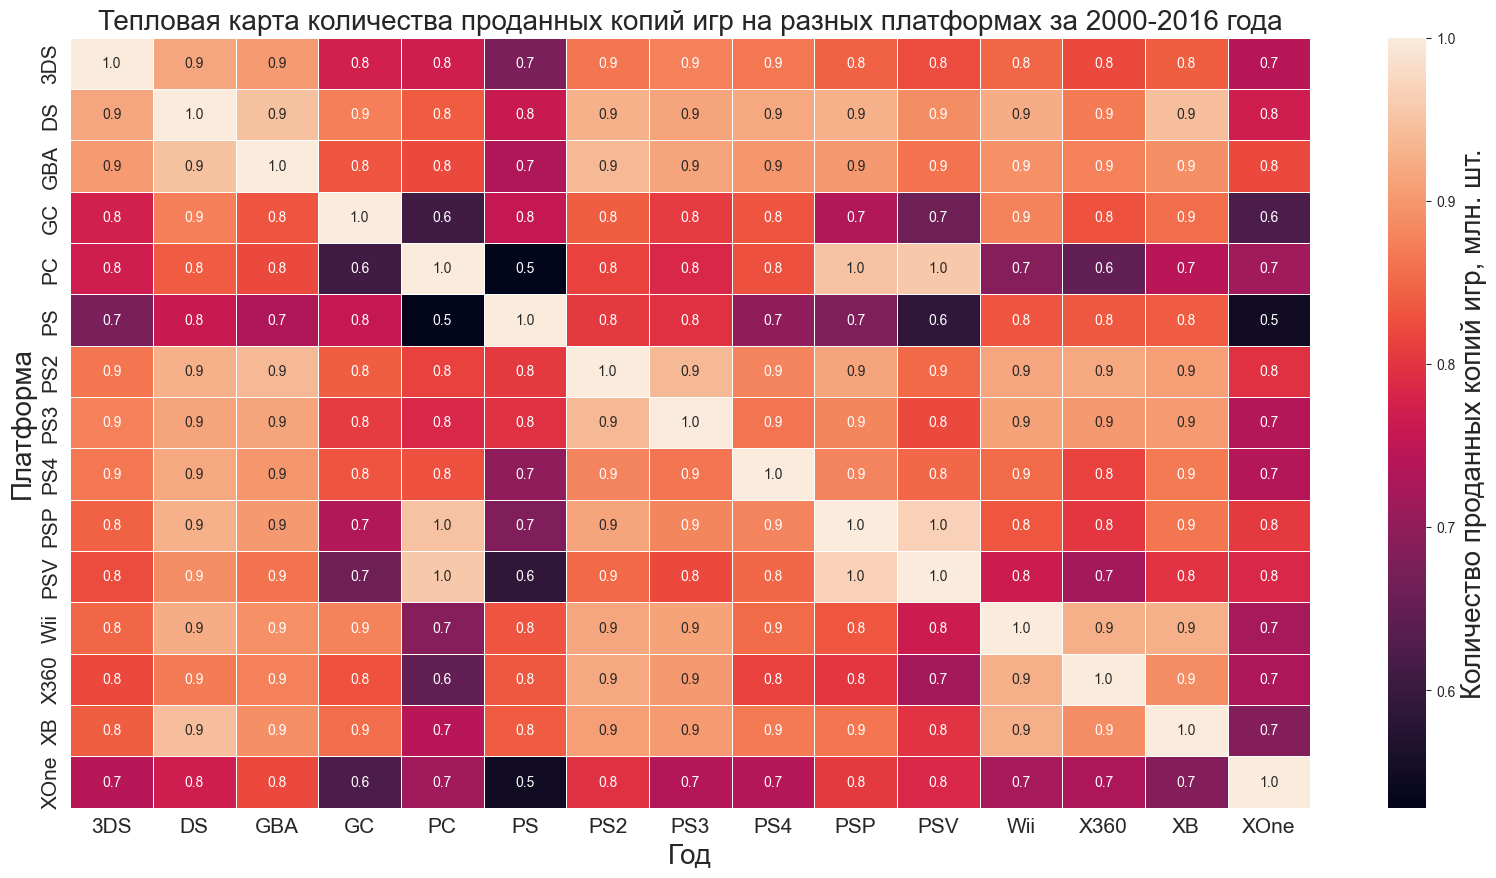

In [34]:
data_heat_temp = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
delete_platform = ["PCFX", "GG", "3DO", "TG16", "WS", "NG", "SCD", "DC", "GEN", "SAT", "2600", "GB", "NES", "WiiU", "N64"]
for i in delete_platform:
    data_heat_temp = data_heat_temp[data_heat_temp.Platform != i]
data_heat_temp = data_heat_temp[data_heat_temp.Year_of_Release > 1999]
data_heat_temp = data_heat_temp[data_heat_temp.Year_of_Release < 2017]
data_heat_temp['Name']=data_heat_temp['Name'].astype('category').cat.codes

sns.set_style("white")
plt.figure(figsize=(20, 10))
platform_genre_sales = data_heat_temp.pivot_table(index='Global_Sales', columns='Platform', values='Name', aggfunc=sum).fillna(0).applymap(float)
ax = sns.heatmap(platform_genre_sales.corr(),annot=True,fmt=".1f",linewidth=.5, cbar_kws={'label': "Количество проданных копий игр, млн. шт."})
ax.figure.axes[-1].yaxis.label.set_size(20)
plt.title('Тепловая карта количества проданных копий игр на разных платформах за 2000-2016 года',fontdict={'fontsize':20})
plt.ylabel('Платформа', fontsize=20)
plt.xlabel('Год', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

C:\Users\v1d3k\AppData\Local\Temp\ipykernel_16288\3529881777.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Platform']=newdf['Platform'].astype('category').cat.codes


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]),
 [Text(0, 0.5, '0'),
  Text(0, 1.5, '1'),
  Text(0, 2.5, '2'),
  Text(0, 3.5, '3'),
  Text(0, 4.5, '4'),
  Text(0, 5.5, '5'),
  Text(0, 6.5, '6'),
  Text(0, 7.5, '7'),
  Text(0, 8.5, '8'),
  Text(0, 9.5, '9'),
  Text(0, 10.5, '10'),
  Text(0, 11.5, '11'),
  Text(0, 12.5, '12'),
  Text(0, 13.5, '13'),
  Text(0, 14.5, '14')])

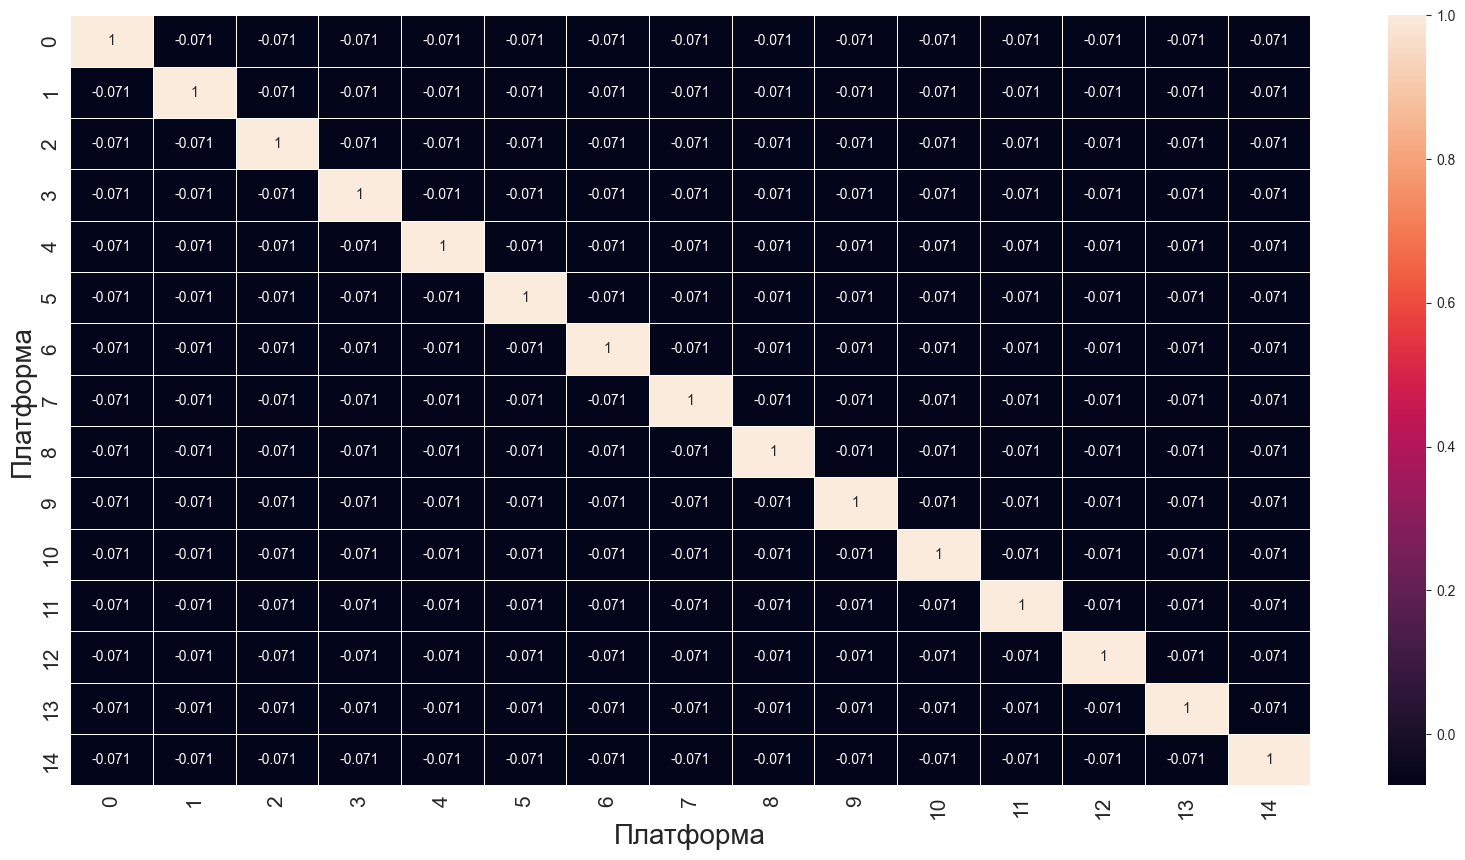

In [32]:
data_heat_temp = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
delete_platform = ["PCFX", "GG", "3DO", "TG16", "WS", "NG", "SCD", "DC", "GEN", "SAT", "2600", "GB", "NES", "WiiU", "N64"]
for i in delete_platform:
    data_heat_temp = data_heat_temp[data_heat_temp.Platform != i]
data_heat_temp = data_heat_temp[data_heat_temp.Year_of_Release > 1999]
data_heat_temp = data_heat_temp[data_heat_temp.Year_of_Release < 2017]
data_heat_temp['Platform']=data_heat_temp['Platform'].astype('category').cat.codes
newdf = data_heat_temp[['Platform', 'Year_of_Release']]
newdf['Platform']=newdf['Platform'].astype('category').cat.codes
newdf.corr()
sns.set_style("white")
plt.figure(figsize=(20, 10))
platform_genre_sales = newdf.pivot_table(index='Platform', columns='Platform', values='Year_of_Release', aggfunc=sum).fillna(0).applymap(float)
ax = sns.heatmap(platform_genre_sales.corr(),annot=True, linewidth=.5, cbar_kws={'label': ""})
ax.figure.axes[-1].yaxis.label.set_size(20)
plt.title('',fontdict={'fontsize':20})
plt.ylabel('Платформа', fontsize=20)
plt.xlabel('Платформа', fontsize=20)
plt.xticks(rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

C:\Users\v1d3k\AppData\Local\Temp\ipykernel_16288\614663149.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_cor.corr(),annot=True, fmt=".2f")


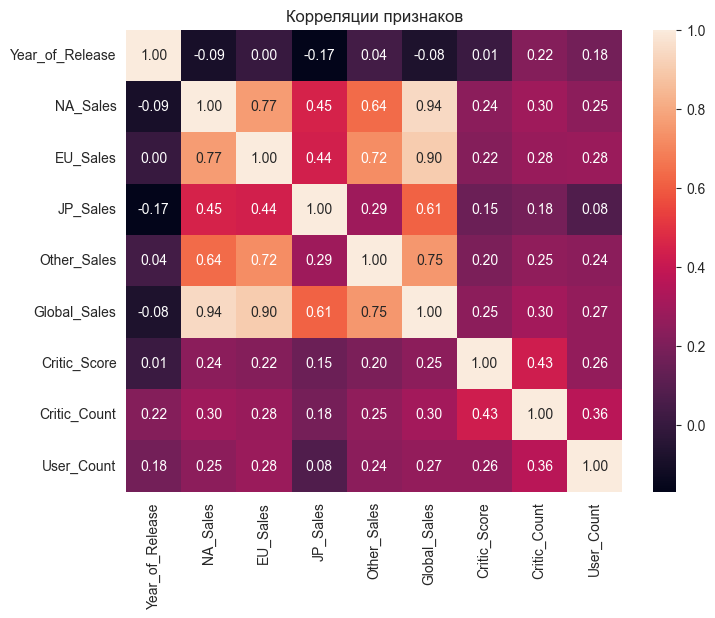

In [10]:
data_cor = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
#data_cor['Platform']=data_cor['Platform'].astype('category').cat.codes
#data_cor['Name']=data_cor['Name'].astype('category').cat.codes
plt.figure(figsize=(8,6))
sns.heatmap(data_cor.corr(),annot=True, fmt=".2f")
plt.title('Корреляции признаков')
plt.show()

In [11]:
newdf = data_heat_temp[['Platform', 'Year_of_Release']]
newdf['Platform']=newdf['Platform'].astype('category').cat.codes
newdf.corr()

C:\Users\v1d3k\AppData\Local\Temp\ipykernel_16288\4155886664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Platform']=newdf['Platform'].astype('category').cat.codes


,Platform,Year_of_Release
Platform,1.000000,0.152429
Year_of_Release,0.152429,1.000000


C:\Users\v1d3k\AppData\Local\Temp\ipykernel_16288\3581360042.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, cbar=False)


<AxesSubplot: >

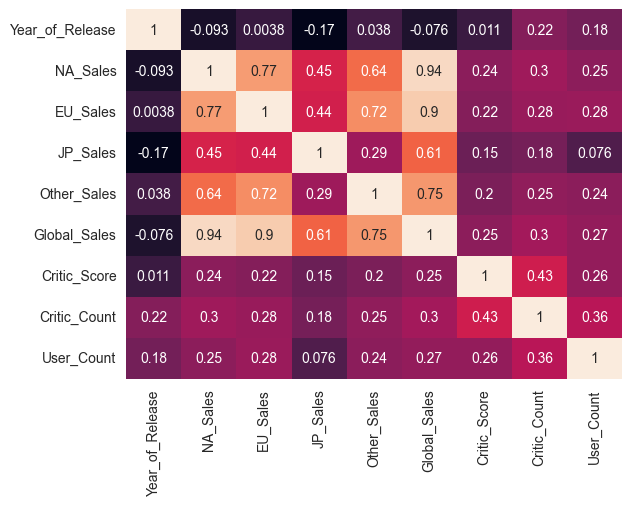

In [12]:
sns.heatmap(data.corr(), annot = True, cbar=False)

C:\Users\v1d3k\AppData\Local\Temp\ipykernel_16288\641145206.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data_heat_temp.corr()[['Year_of_Release']].sort_values(by='Year_of_Release', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')


Text(0.5, 1.0, 'Features Correlating with Sales Price')

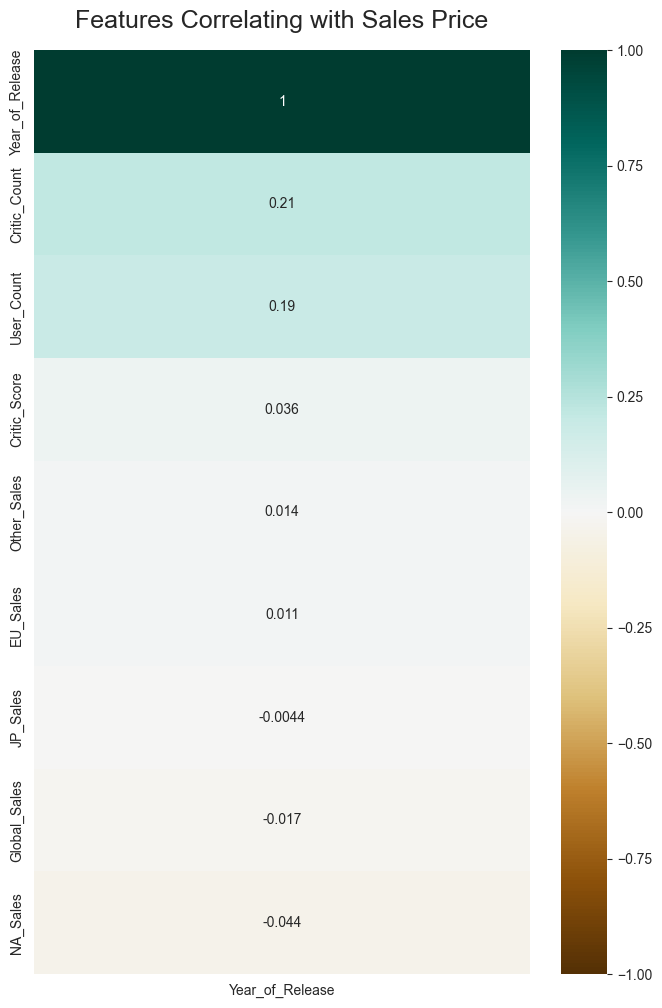

In [13]:
data_heat_temp = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
delete_platform = ["PCFX", "GG", "3DO", "TG16", "WS", "NG", "SCD", "DC", "GEN", "SAT", "2600", "GB", "NES", "WiiU", "N64"]
for i in delete_platform:
    data_heat_temp = data_heat_temp[data_heat_temp.Platform != i]
data_heat_temp = data_heat_temp[data_heat_temp.Year_of_Release > 1999]
data_heat_temp = data_heat_temp[data_heat_temp.Year_of_Release < 2017]

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data_heat_temp.corr()[['Year_of_Release']].sort_values(by='Year_of_Release', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16)

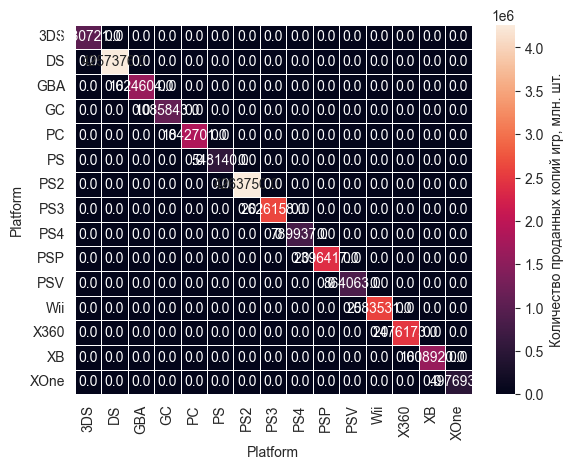

In [14]:
newdf = data_heat_temp[['Platform', 'Year_of_Release']]
platform_genre_sales = newdf.pivot_table(index='Platform', columns='Platform', values='Year_of_Release', aggfunc=sum).fillna(0).applymap(float)
ax = sns.heatmap(platform_genre_sales,annot=True,fmt=".1f",linewidth=.5, cbar_kws={'label': "Количество проданных копий игр, млн. шт."})

In [15]:
df = pd.DataFrame(["Platform"],
                  index=['Global_Sales'])
sns.heatmap(df, annot=True, fmt="g", cmap='viridis')

plt.show()

ValueError: could not convert string to float: 'Platform'

TypeError: Series.corr() missing 1 required positional argument: 'other'

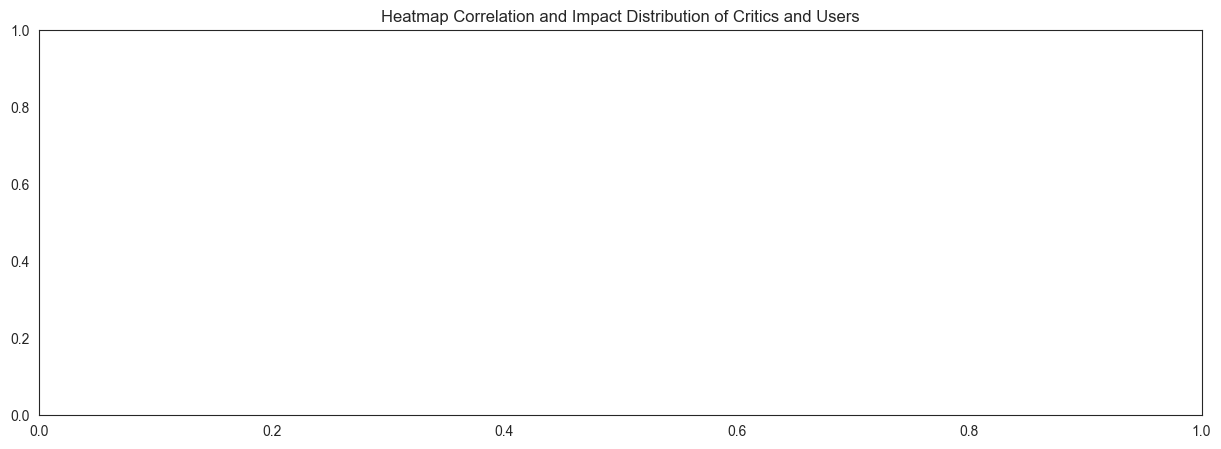

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Heatmap Correlation and Impact Distribution of Critics and Users')
sns.heatmap(data[['Platform', 'NA_Sales', 'EU_Sales']].corr(), annot=True, cmap='mako', fmt='.3f')
plt.show()

In [ ]:
import pandas as pd

df = pd.DataFrame()
df['US_State'] = ["Alabama", "Alabama", "Alabama", "Michigan", "Michigan", "Michigan", "Oregon", "Oregon", "Oregon"]
df['Value'] = [1, 10, 9, 8, 9, 2, 6, 1, 2]

pd.DataFrame(df.groupby("US_State")['Value'].apply(lambda x: list(x))).T.apply(lambda x: pd.Series(*x), axis=0).corr()


US_State,Alabama,Michigan,Oregon
US_State,,,
Alabama,1.000000,-0.285578,-0.996078
Michigan,-0.285578,1.000000,0.199667
Oregon,-0.996078,0.199667,1.000000


In [19]:
data_heat_temp = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
delete_platform = ["PCFX", "GG", "3DO", "TG16", "WS", "NG", "SCD", "DC", "GEN", "SAT", "2600", "GB", "NES", "WiiU", "N64"]
for i in delete_platform:
    data_heat_temp = data_heat_temp[data_heat_temp.Platform != i]
data_heat_temp = data_heat_temp[data_heat_temp.Year_of_Release > 1999]
data_heat_temp = data_heat_temp[data_heat_temp.Year_of_Release < 2017]
data_heat_temp['Platform']=data_heat_temp['Platform'].astype('category').cat.codes

data_heat = data_heat_temp.corr()[['Platform']].sort_values(by='Platform', ascending=False)
plt.figure(figsize=(8,6))
sns.heatmap(data,annot=True, fmt=".2f")
plt.title('Корреляции признаков')
plt.show()

C:\Users\v1d3k\AppData\Local\Temp\ipykernel_16288\1347058167.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_heat = data_heat_temp.corr()[['Platform']].sort_values(by='Platform', ascending=False)


ValueError: could not convert string to float: 'Wii Sports'

<Figure size 800x600 with 0 Axes>

C:\Users\v1d3k\AppData\Local\Temp\ipykernel_14544\892562039.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(x='Platform',y='Global_Sales',data=data.groupby(data['Platform']).sum().Global_Sales.sort_values(ascending=False).reset_index(), palette=sns.cubehelix_palette((40), rot=-.2, reverse=True))


Text(0.5, 0, 'Платформа')

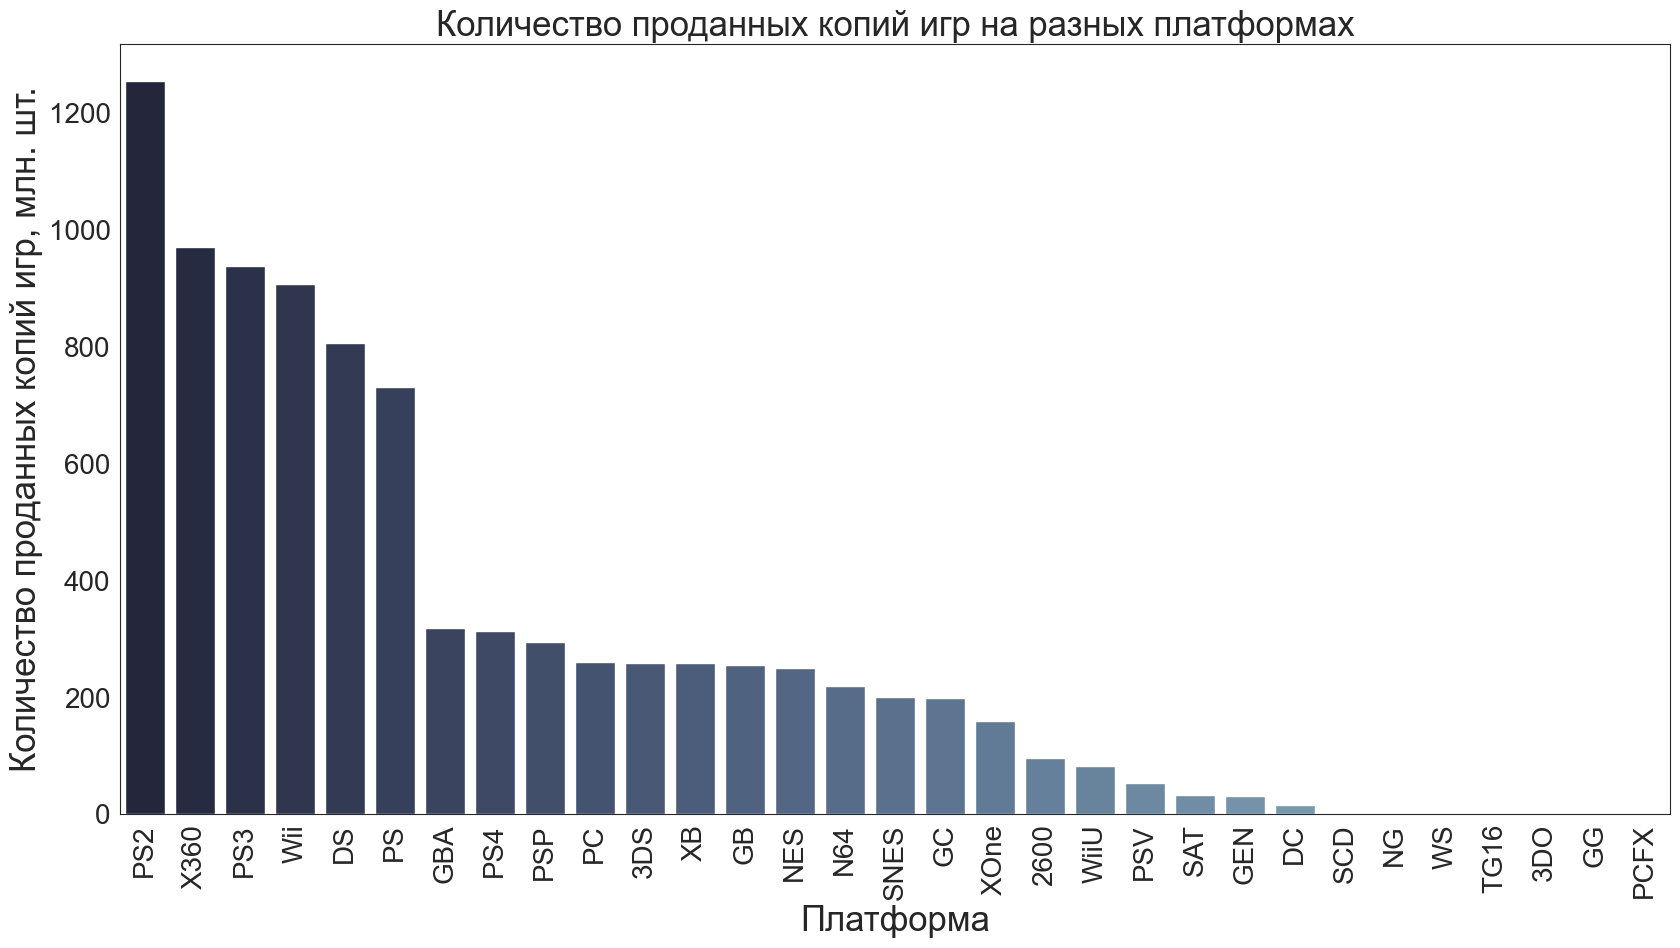

In [ ]:
sns.set_style("white")
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
plt.title('Количество проданных копий игр на разных платформах',fontdict={'fontsize':25})
sns.barplot(x='Platform',y='Global_Sales',data=data.groupby(data['Platform']).sum().Global_Sales.sort_values(ascending=False).reset_index(), palette=sns.cubehelix_palette((40), rot=-.2, reverse=True))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Количество проданных копий игр, млн. шт.', fontsize=25)
plt.xlabel('Платформа', fontsize=25)

C:\Users\v1d3k\AppData\Local\Temp\ipykernel_19832\2711956335.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.pointplot(x='Genre',y='NA_Sales',data=data.groupby(data['Genre'].sort_values()).sum().reset_index(),color='orange')
C:\Users\v1d3k\AppData\Local\Temp\ipykernel_19832\2711956335.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.pointplot(x='Genre',y='EU_Sales',data=data.groupby(data['Genre'].sort_values()).sum().reset_index(),color='red')
C:\Users\v1d3k\AppData\Local\Temp\ipykernel_19832\2711956335.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated

Text(0.5, 0, 'Жанр')

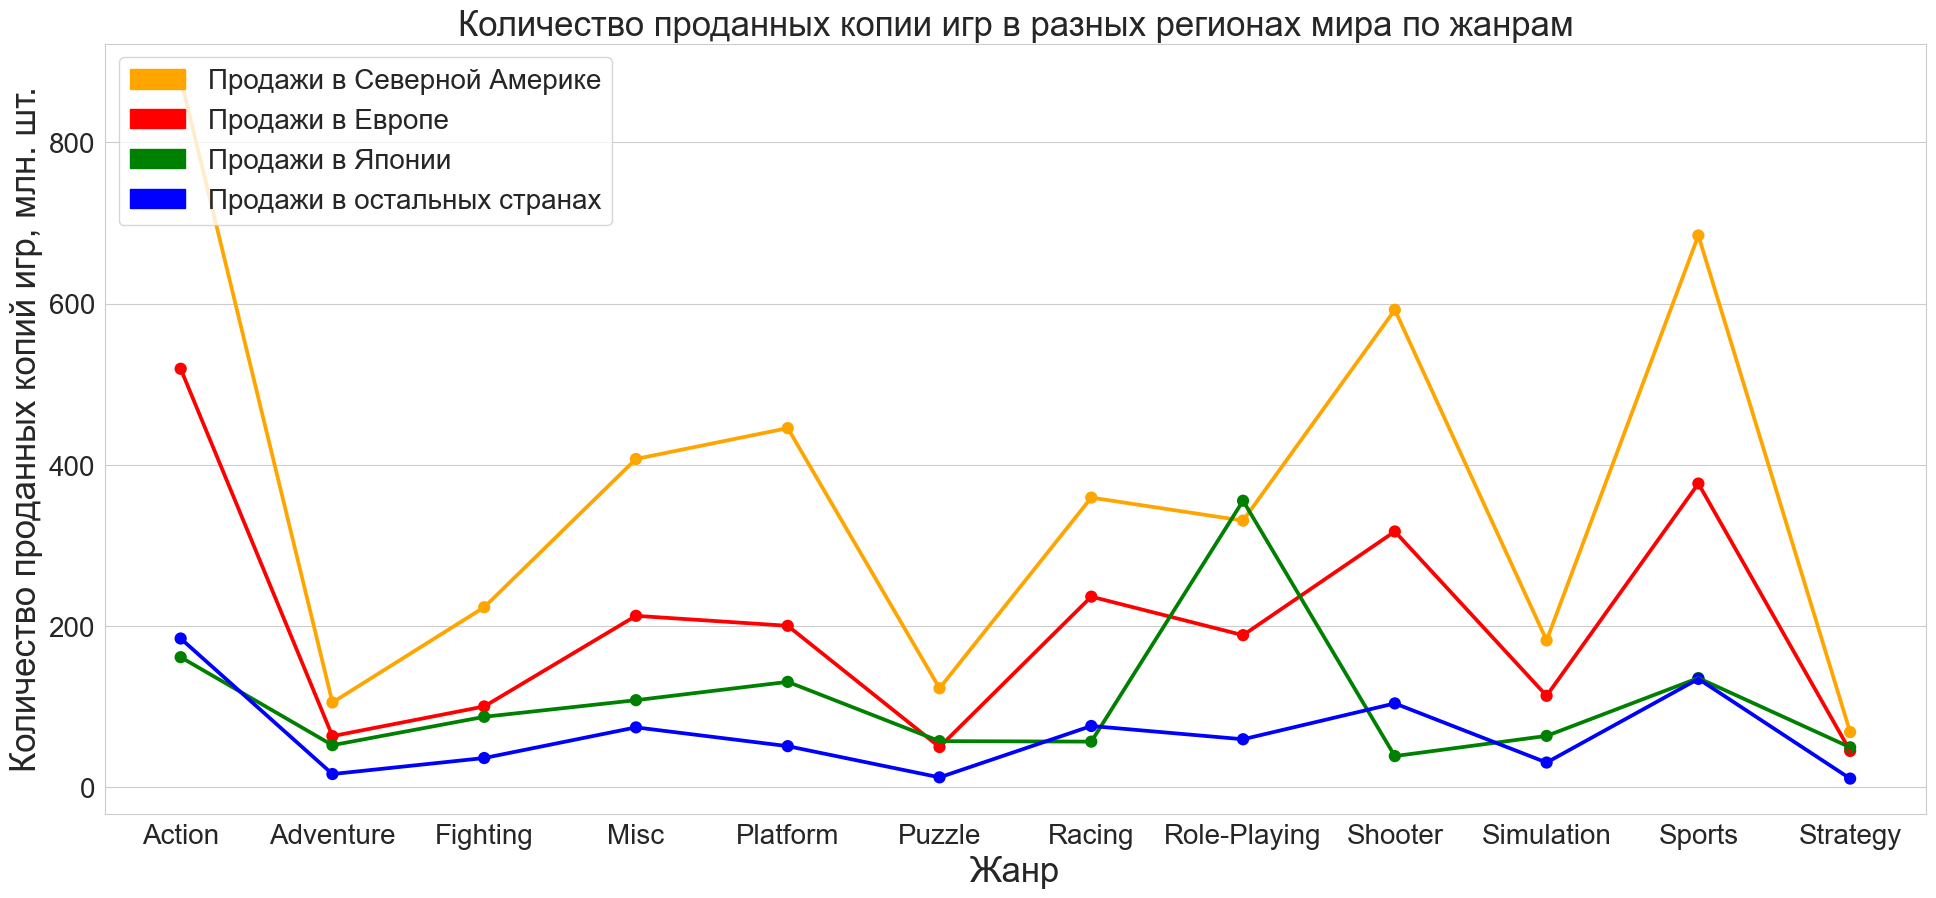

In [ ]:
sns.set_style("whitegrid")
fig=plt.figure(figsize=(23.5,10))
plt.title('Количество проданных копии игр в разных регионах мира по жанрам',fontdict={'fontsize':25})
sns.pointplot(x='Genre',y='NA_Sales',data=data.groupby(data['Genre'].sort_values()).sum().reset_index(),color='orange')
sns.pointplot(x='Genre',y='EU_Sales',data=data.groupby(data['Genre'].sort_values()).sum().reset_index(),color='red')
sns.pointplot(x='Genre',y='JP_Sales',data=data.groupby(data['Genre'].sort_values()).sum().reset_index(),color='green')
sns.pointplot(x='Genre',y='Other_Sales',data=data.groupby(data['Genre'].sort_values()).sum().reset_index(),color='blue')
plt.legend(handles=[mpatches.Patch(color='orange', label='Продажи в Северной Америке'),
                    mpatches.Patch(color='red', label='Продажи в Европе'),
                    mpatches.Patch(color='green', label='Продажи в Японии'),
                    mpatches.Patch(color='blue', label='Продажи в остальных странах')], loc='upper left', fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Количество проданных копий игр, млн. шт.', fontsize = 25)
plt.xlabel('Жанр', fontsize = 25)

C:\Users\v1d3k\AppData\Local\Temp\ipykernel_19832\496817537.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(y='Genre', x='NA_Sales', data=data.groupby('Genre').sum().NA_Sales.sort_values(ascending=False).reset_index(), palette=sns.cubehelix_palette((30), rot=-.2, reverse=True))
C:\Users\v1d3k\AppData\Local\Temp\ipykernel_19832\496817537.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(y='Genre', x='EU_Sales', data=data.groupby('Genre').sum().EU_Sales.sort_values(ascending=False).reset_index(), palette=sns.cubehelix_palette((30), rot=-.2, reverse=True))
C:\Users\v1d3k\AppData\Lo

Text(0.5, 0, 'Количество выпущенных игр, шт.')

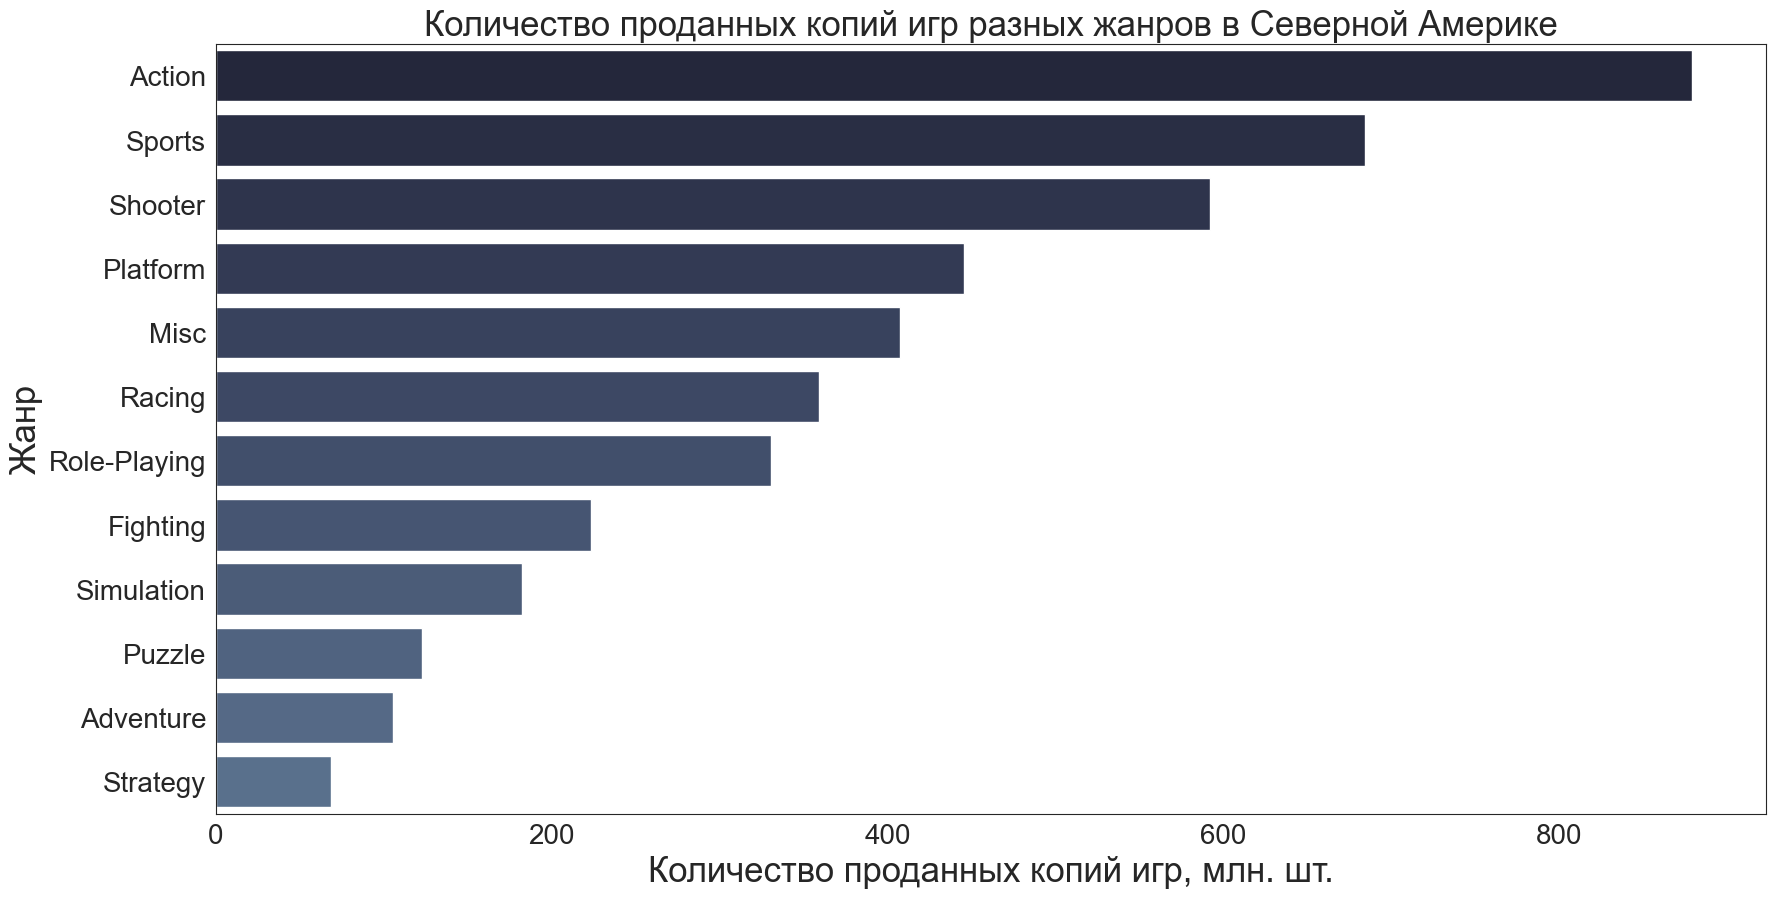

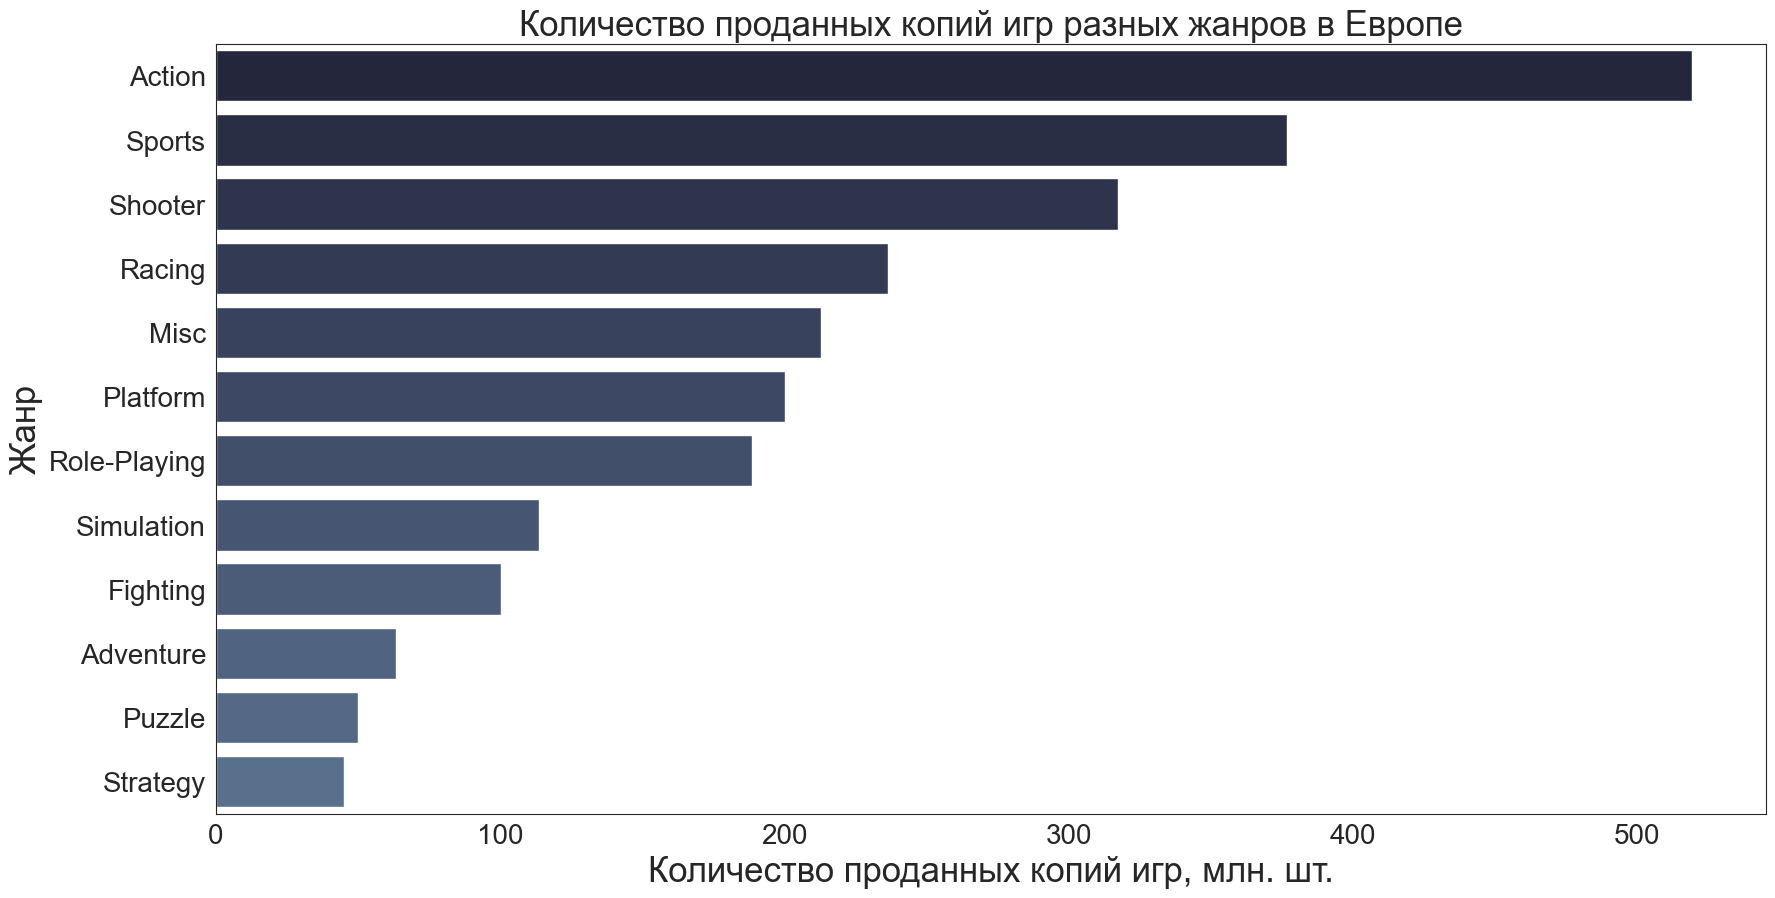

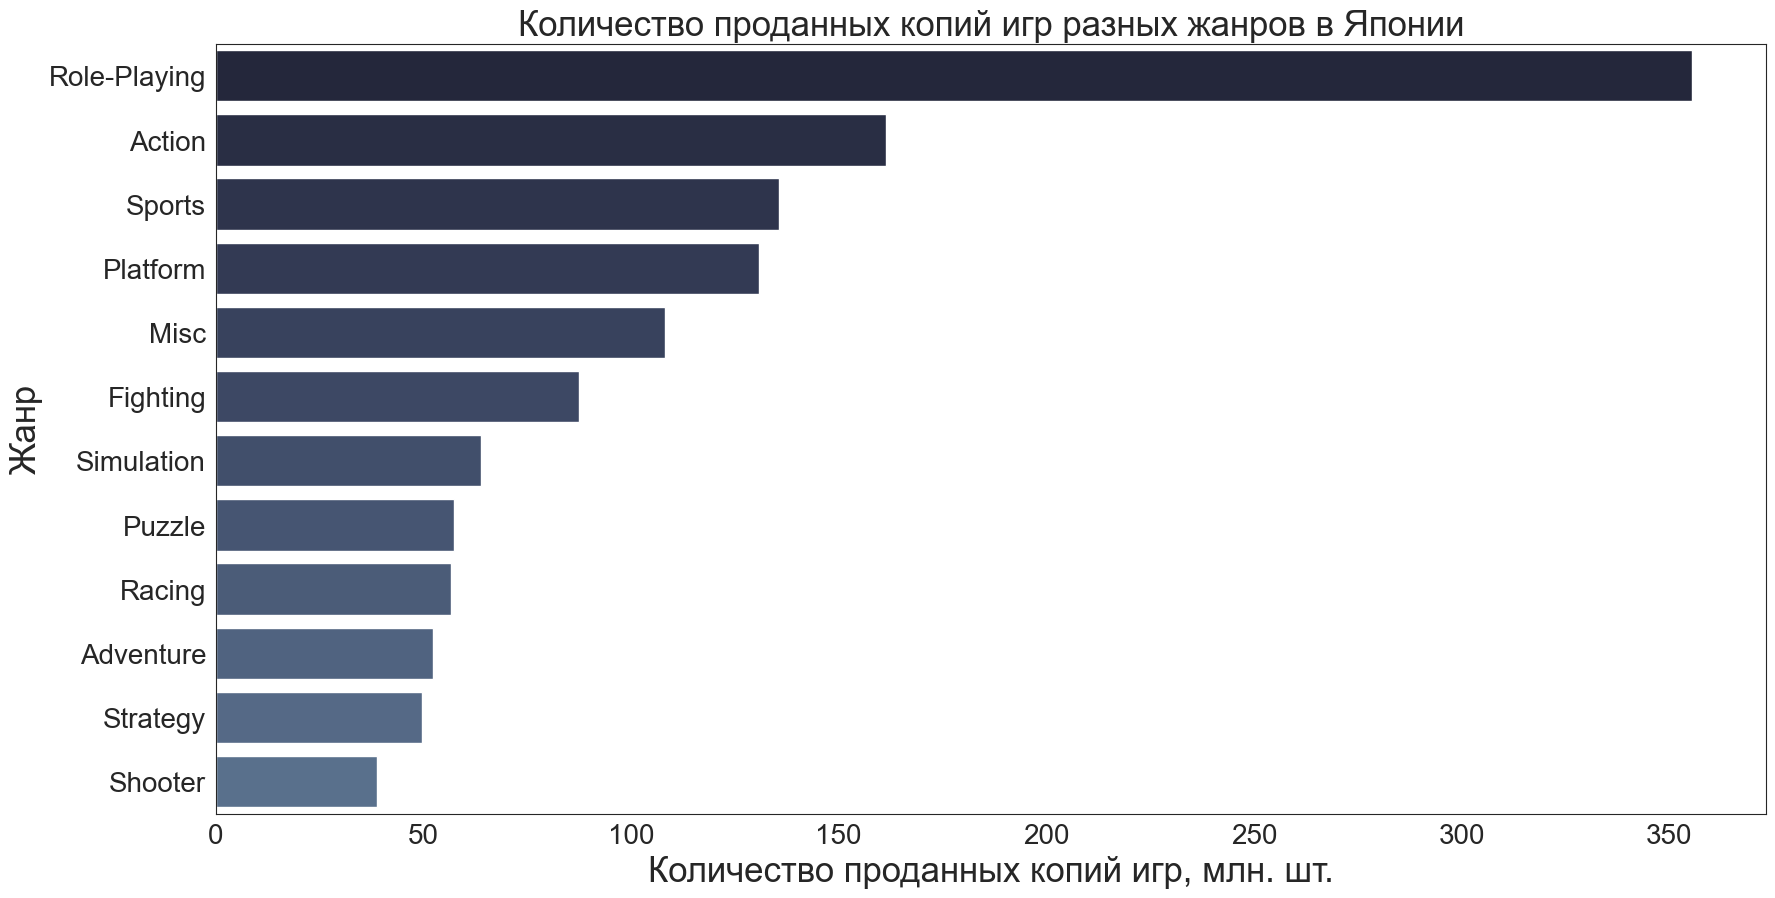

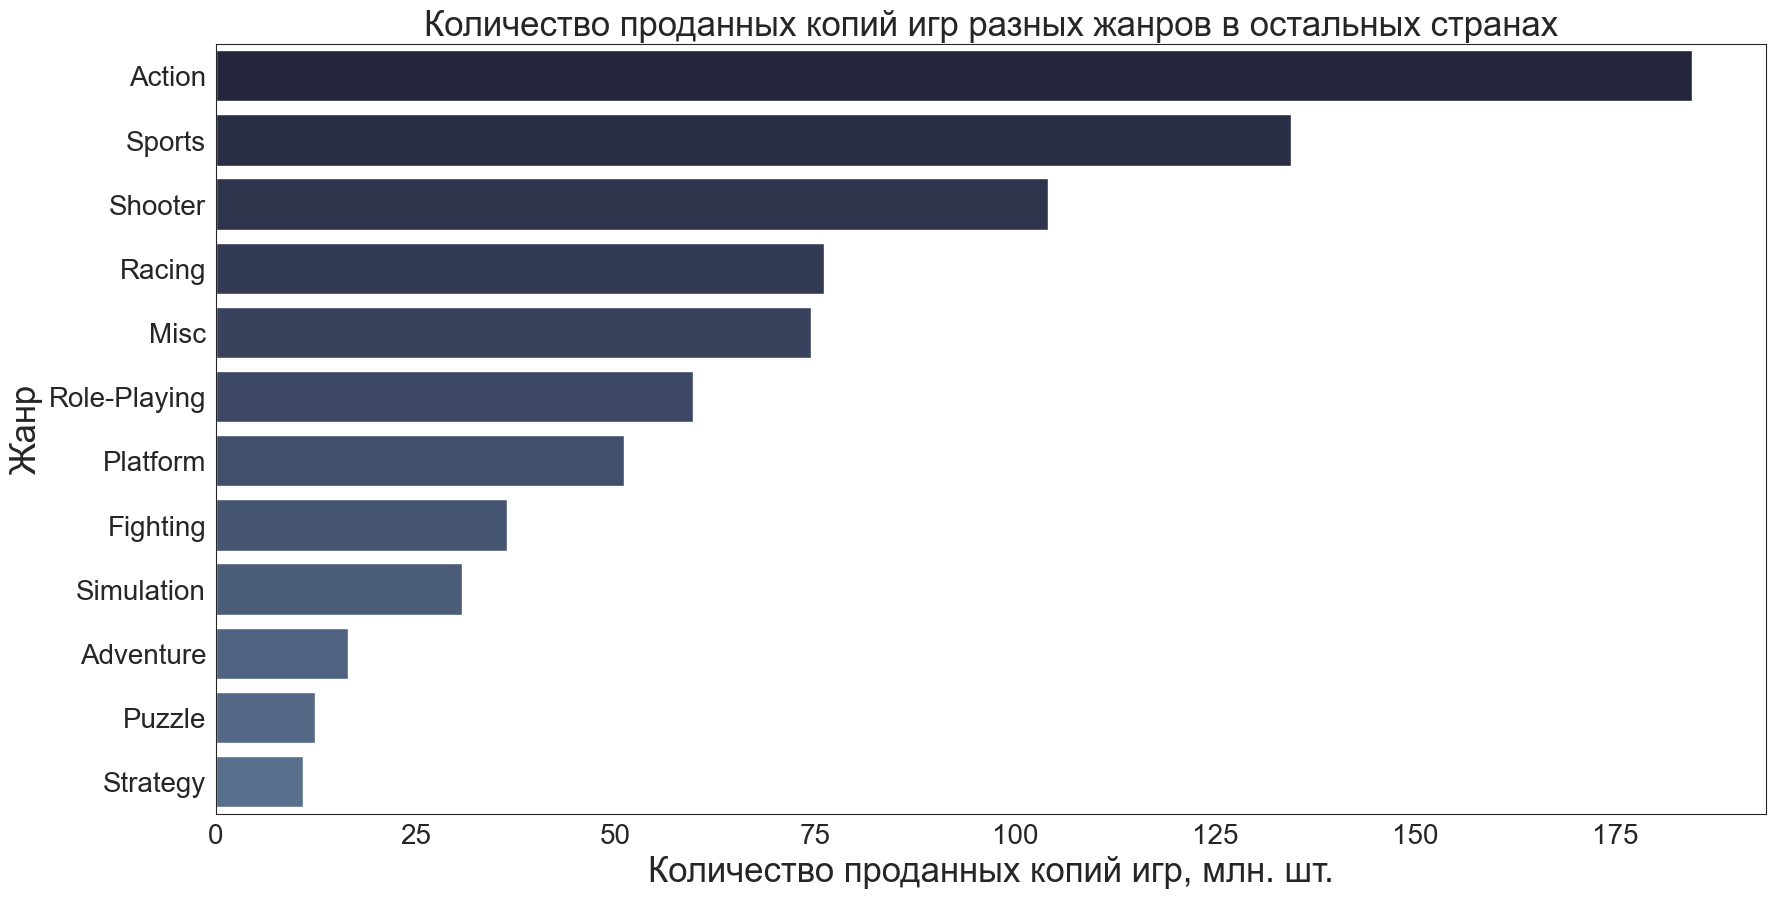

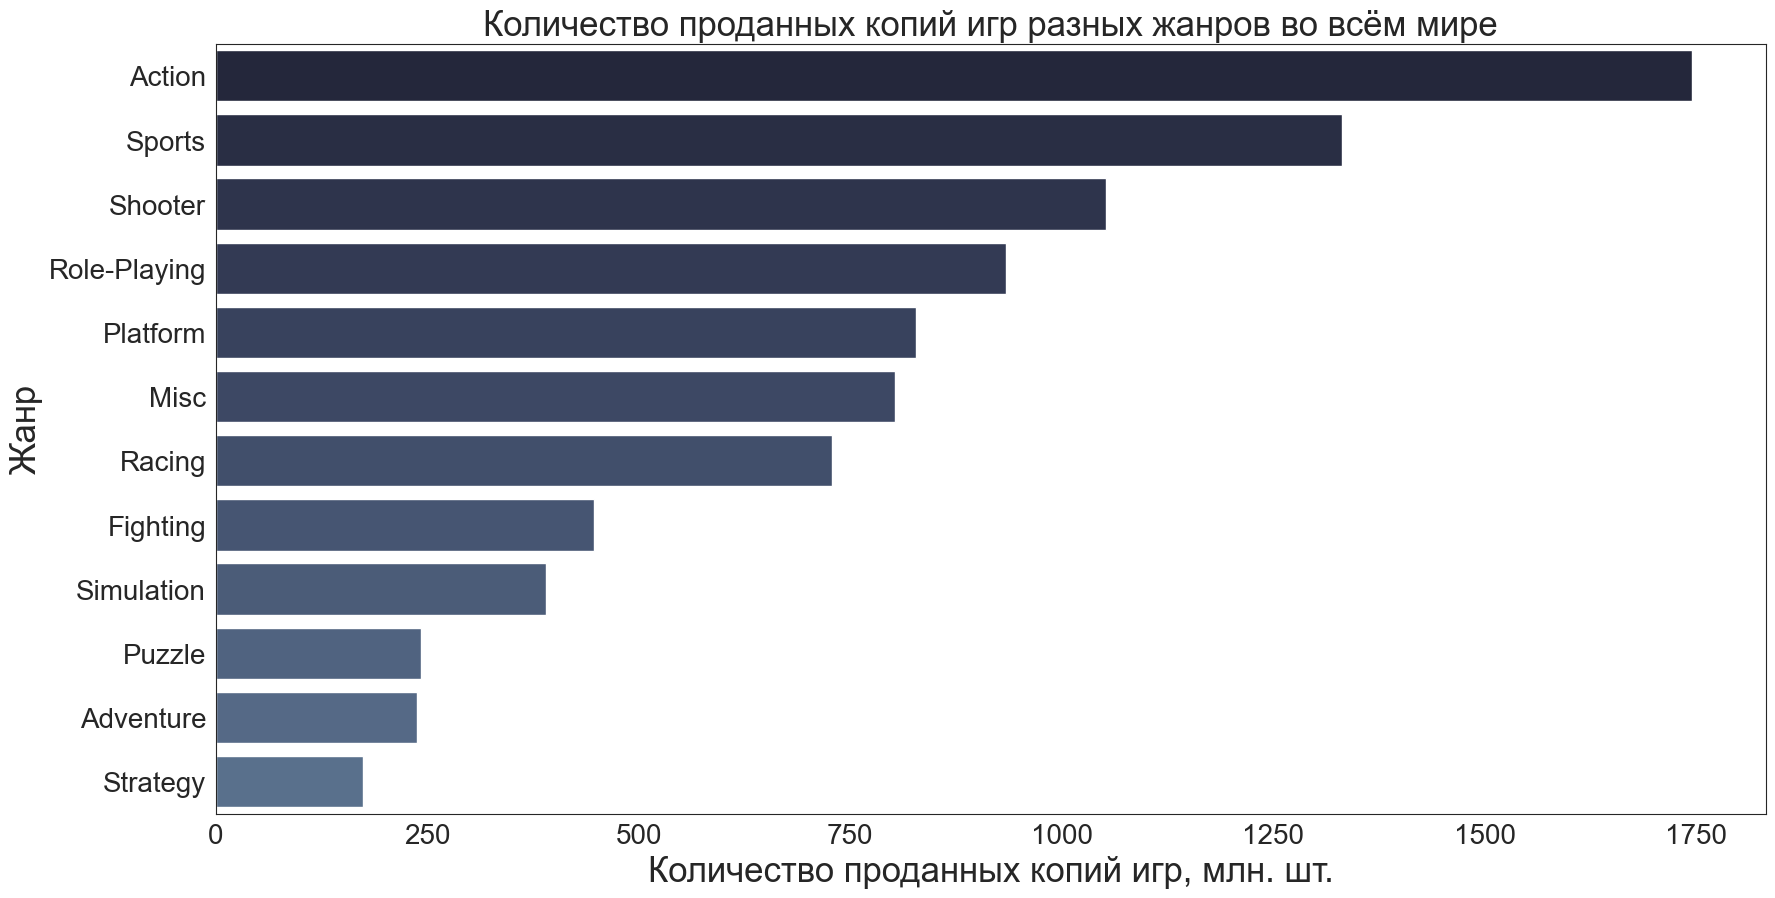

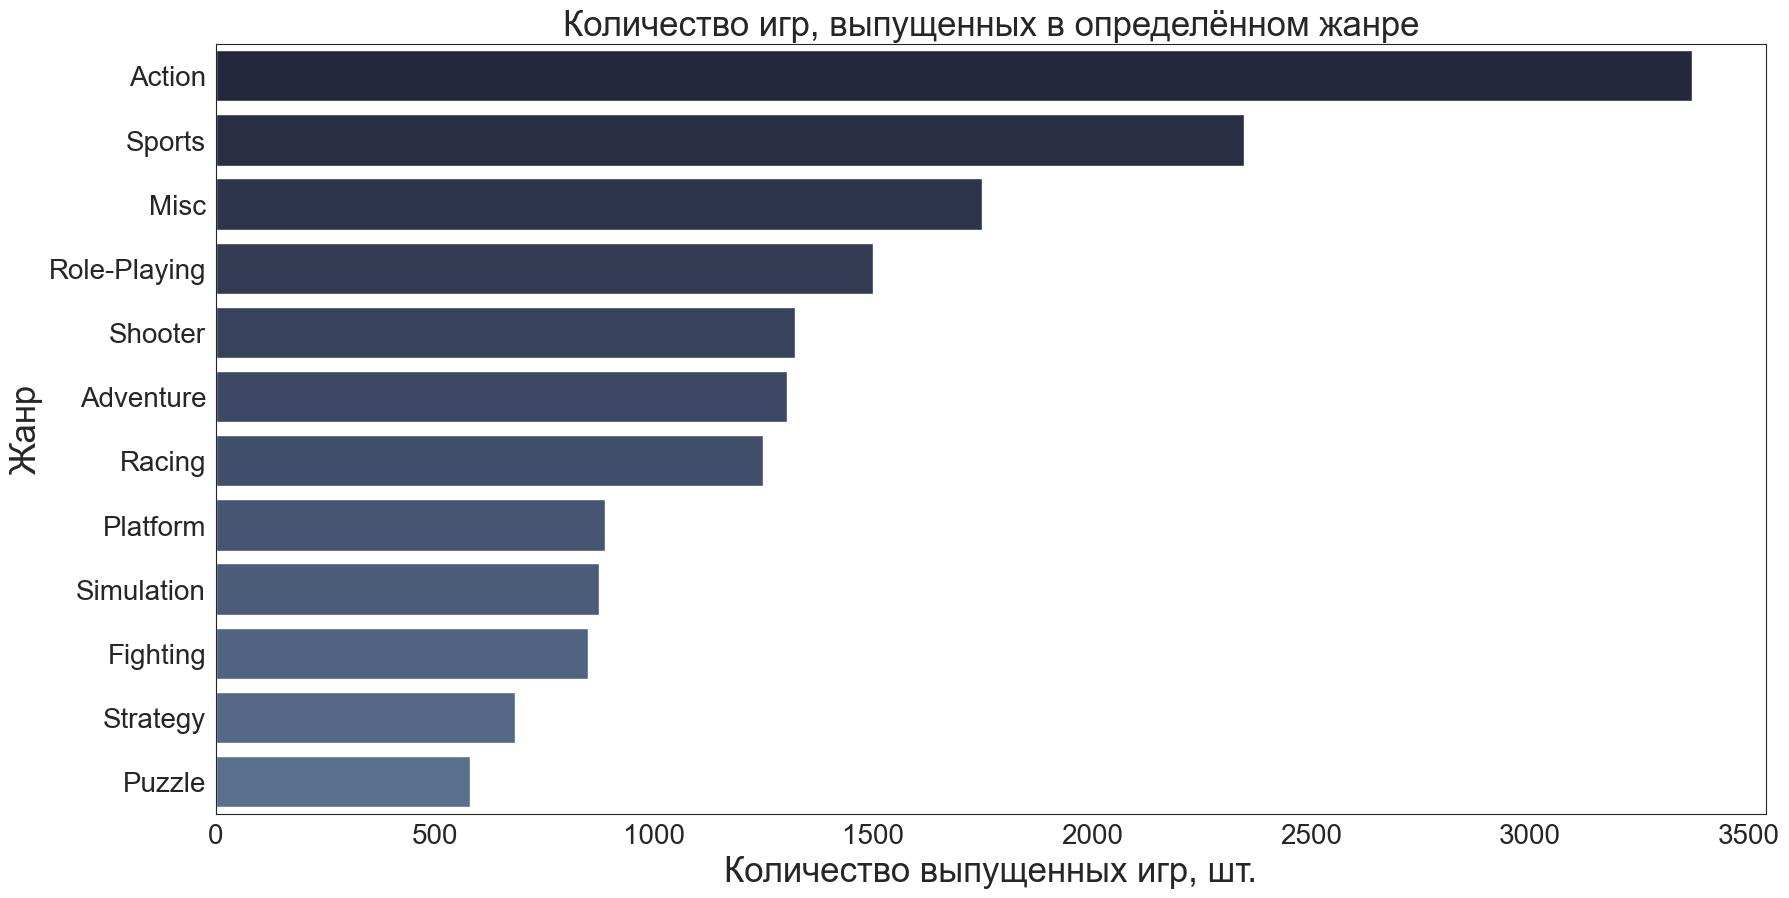

In [ ]:
sns.set_style("white")
plt.figure(figsize=(20, 10))
plt.title('Количество проданных копий игр разных жанров в Северной Америке',fontdict={'fontsize':25})
sns.barplot(y='Genre', x='NA_Sales', data=data.groupby('Genre').sum().NA_Sales.sort_values(ascending=False).reset_index(), palette=sns.cubehelix_palette((30), rot=-.2, reverse=True))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Жанр', fontsize=25)
plt.xlabel('Количество проданных копий игр, млн. шт.', fontsize=25)

sns.set_style("white")
plt.figure(figsize=(20, 10))
plt.title('Количество проданных копий игр разных жанров в Европе',fontdict={'fontsize':25})
sns.barplot(y='Genre', x='EU_Sales', data=data.groupby('Genre').sum().EU_Sales.sort_values(ascending=False).reset_index(), palette=sns.cubehelix_palette((30), rot=-.2, reverse=True))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Жанр', fontsize=25)
plt.xlabel('Количество проданных копий игр, млн. шт.', fontsize=25)

sns.set_style("white")
plt.figure(figsize=(20, 10))
plt.title('Количество проданных копий игр разных жанров в Японии',fontdict={'fontsize':25})
sns.barplot(y='Genre', x='JP_Sales', data=data.groupby('Genre').sum().JP_Sales.sort_values(ascending=False).reset_index(), palette=sns.cubehelix_palette((30), rot=-.2, reverse=True))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Жанр', fontsize=25)
plt.xlabel('Количество проданных копий игр, млн. шт.', fontsize=25)

sns.set_style("white")
plt.figure(figsize=(20, 10))
plt.title('Количество проданных копий игр разных жанров в остальных странах',fontdict={'fontsize':25})
sns.barplot(y='Genre', x='Other_Sales', data=data.groupby('Genre').sum().Other_Sales.sort_values(ascending=False).reset_index(), palette=sns.cubehelix_palette((30), rot=-.2, reverse=True))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Жанр', fontsize=25)
plt.xlabel('Количество проданных копий игр, млн. шт.', fontsize=25)

sns.set_style("white")
plt.figure(figsize=(20, 10))
plt.title('Количество проданных копий игр разных жанров во всём мире',fontdict={'fontsize':25})
sns.barplot(y='Genre', x='Global_Sales', data=data.groupby('Genre').sum().Global_Sales.sort_values(ascending=False).reset_index(), palette=sns.cubehelix_palette((30), rot=-.2, reverse=True))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Жанр', fontsize=25)
plt.xlabel('Количество проданных копий игр, млн. шт.', fontsize=25)

sns.set_style("white")
plt.figure(figsize=(20, 10))
plt.title('Количество игр, выпущенных в определённом жанре',fontdict={'fontsize':25})
sns.barplot(y=data['Genre'].value_counts().index, x=data['Genre'].value_counts(), palette=sns.cubehelix_palette((30), rot=-.2, reverse=True))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Жанр', fontsize=25)
plt.xlabel('Количество выпущенных игр, шт.', fontsize=25)

C:\Users\v1d3k\AppData\Local\Temp\ipykernel_19832\2467208229.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(x='Year_of_Release',y='Global_Sales',data=data.groupby(data['Year_of_Release'].sort_values()).sum().Global_Sales.reset_index(), palette=sns.cubehelix_palette((40), rot=-.2, reverse=True))


Text(0.5, 0, 'Год')

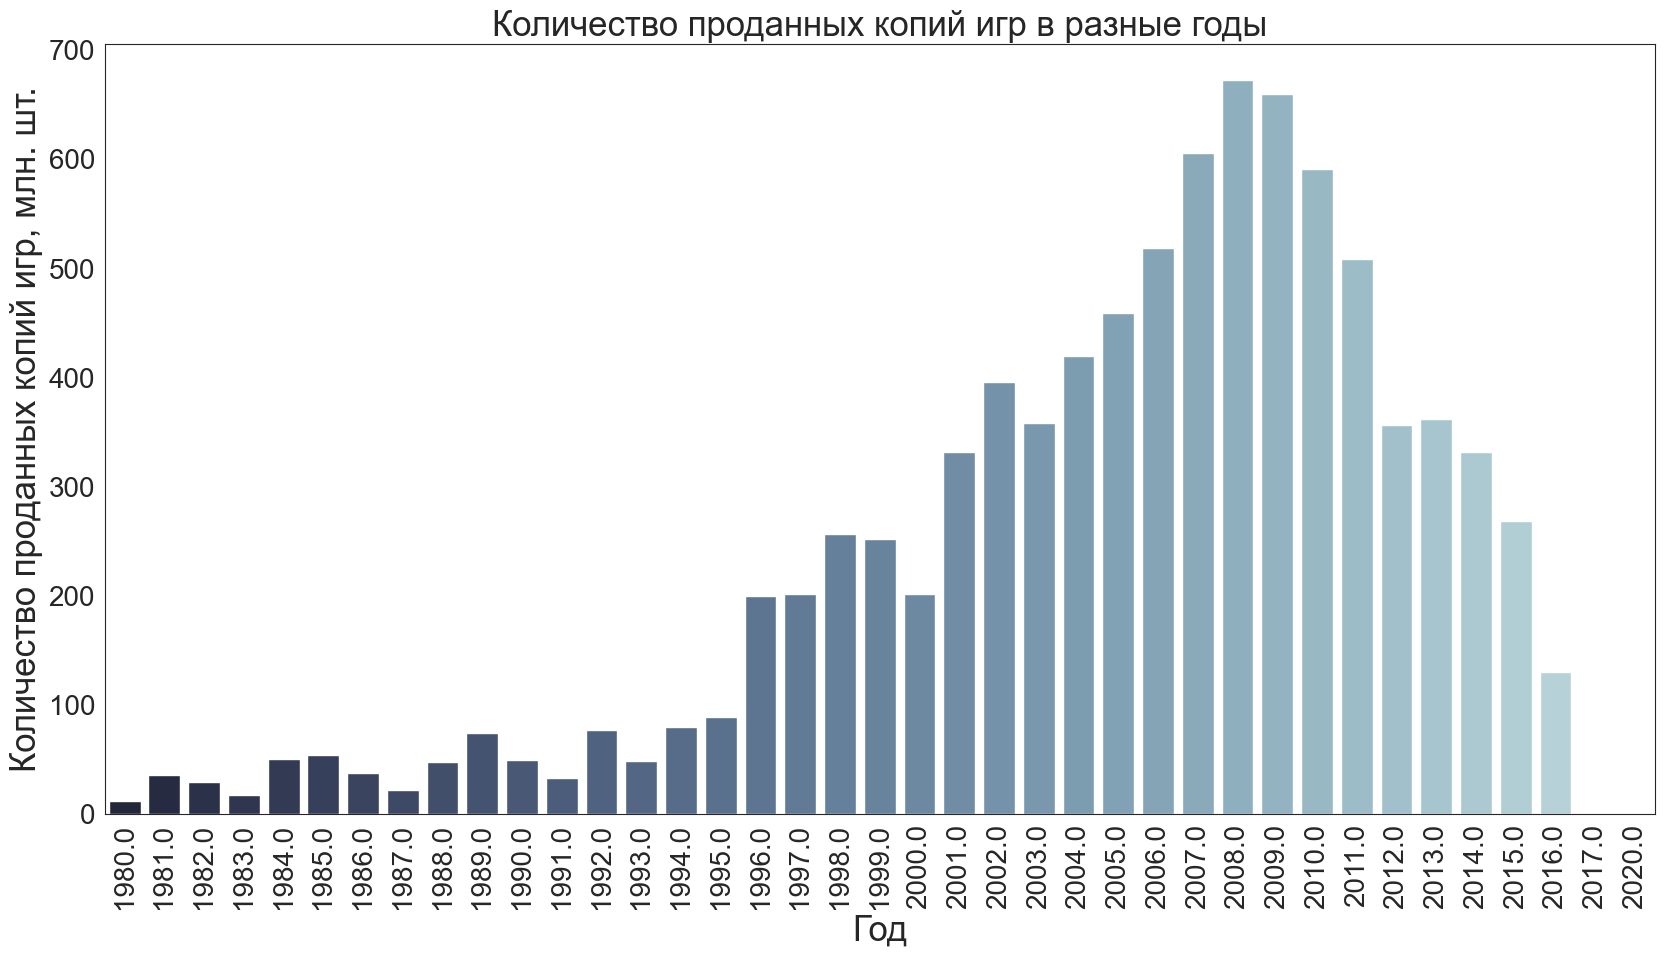

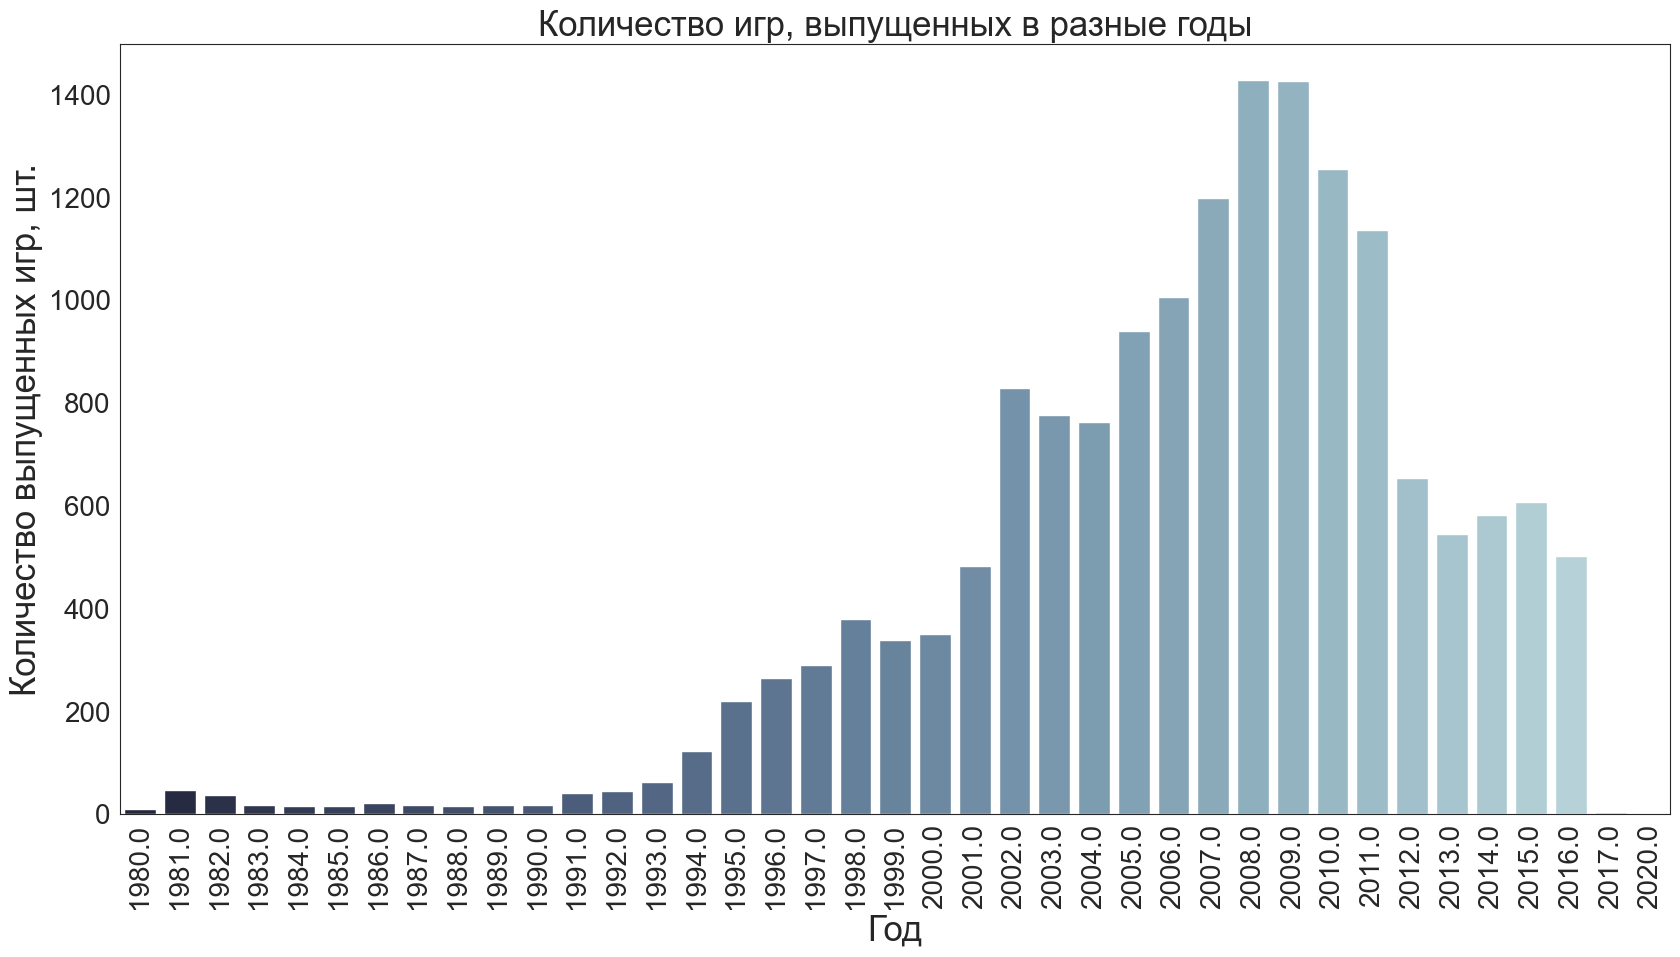

In [ ]:
sns.set_style("white")
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
plt.title('Количество проданных копий игр в разные годы',fontdict={'fontsize':25})
sns.barplot(x='Year_of_Release',y='Global_Sales',data=data.groupby(data['Year_of_Release'].sort_values()).sum().Global_Sales.reset_index(), palette=sns.cubehelix_palette((40), rot=-.2, reverse=True))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Количество проданных копий игр, млн. шт.', fontsize=25)
plt.xlabel('Год', fontsize=25)

sns.set_style("white")
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
plt.title('Количество игр, выпущенных в разные годы',fontdict={'fontsize':25})
sns.barplot(x=data.Year_of_Release.value_counts().index, y=data.Year_of_Release.value_counts(), palette=sns.cubehelix_palette((40), rot=-.2, reverse=True))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Количество выпущенных игр, шт.', fontsize=25)
plt.xlabel('Год', fontsize=25)

Text(0.5, 0, 'Год')

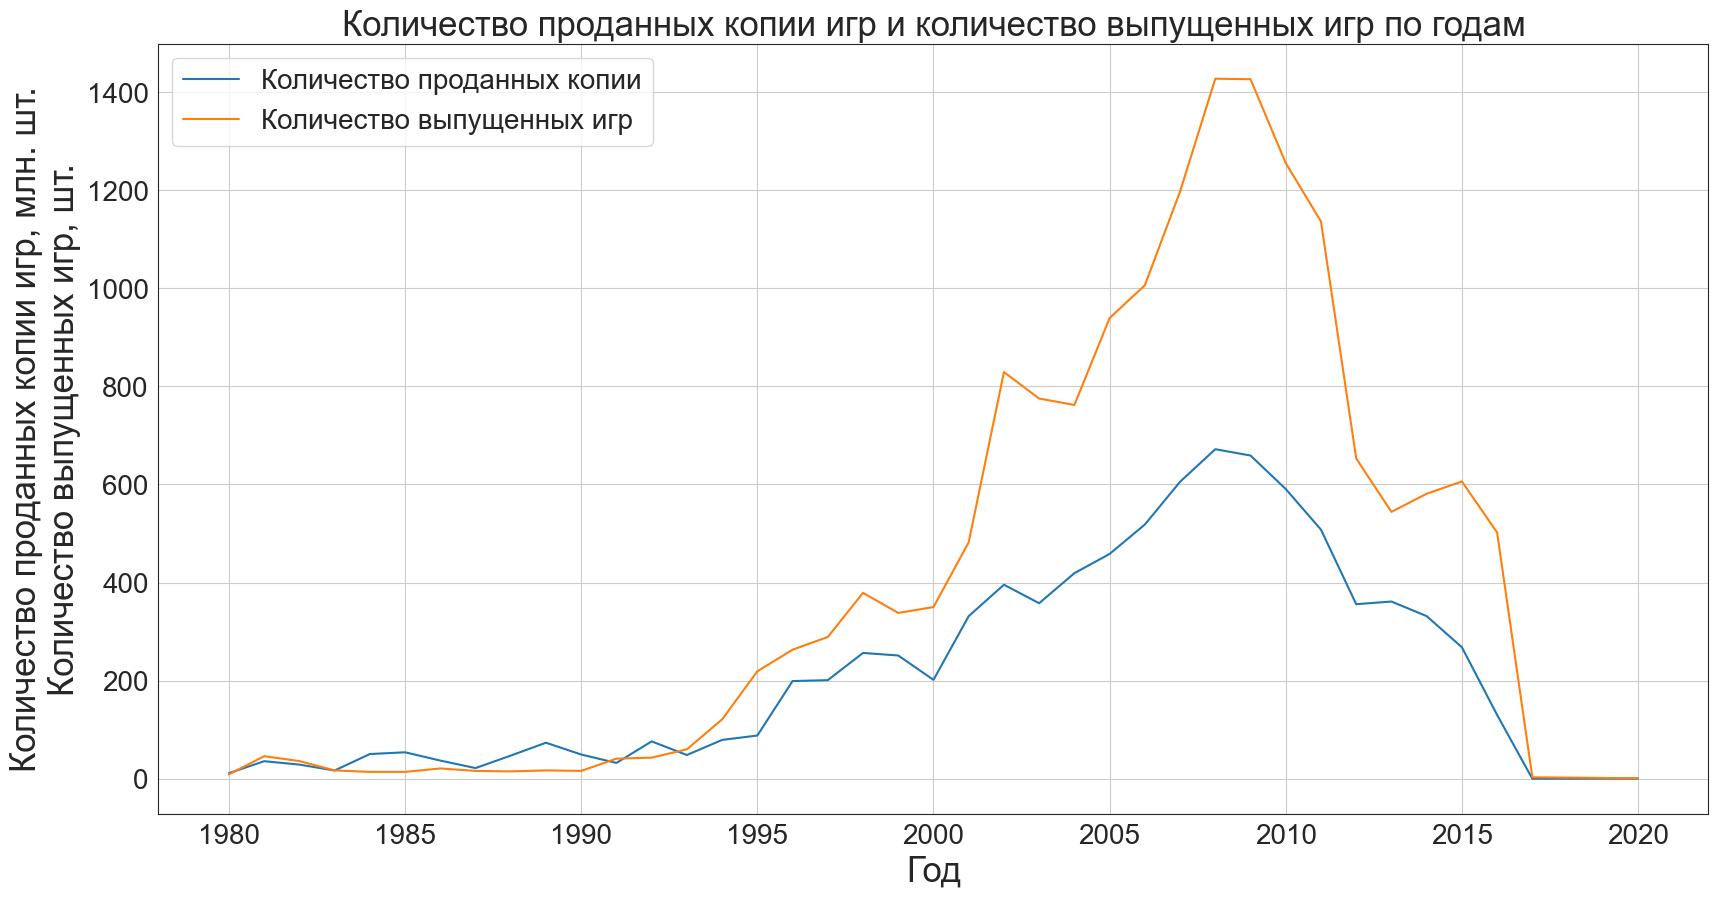

In [ ]:
plt.figure(figsize=(20, 10))
plt.title('Количество проданных копии игр и количество выпущенных игр по годам',fontdict={'fontsize':25})
data.groupby('Year_of_Release')['Global_Sales'].sum().plot(legend=True, label='Количество проданных копии').legend(loc=2, prop={'size': 20})
data.groupby('Year_of_Release')['Name'].count().plot(legend=True, grid=True, label='Количество выпущенных игр').legend(loc=2, prop={'size': 20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Количество проданных копии игр, млн. шт.\nКоличество выпущенных игр, шт.', fontsize=25)
plt.xlabel('Год', fontsize=25)

C:\Users\v1d3k\AppData\Local\Temp\ipykernel_19832\3822856541.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.pointplot(x='Year_of_Release',y='NA_Sales',data=data.groupby(data['Year_of_Release'].sort_values()).sum().drop(['Year_of_Release'],axis=1).reset_index(),color='orange')
C:\Users\v1d3k\AppData\Local\Temp\ipykernel_19832\3822856541.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.pointplot(x='Year_of_Release',y='EU_Sales',data=data.groupby(data['Year_of_Release'].sort_values()).sum().drop(['Year_of_Release'],axis=1).reset_index(),color='red')
C:\Users\v1d3k\AppData\Local\Temp\ipykernel_198

Text(0.5, 0, 'Год')

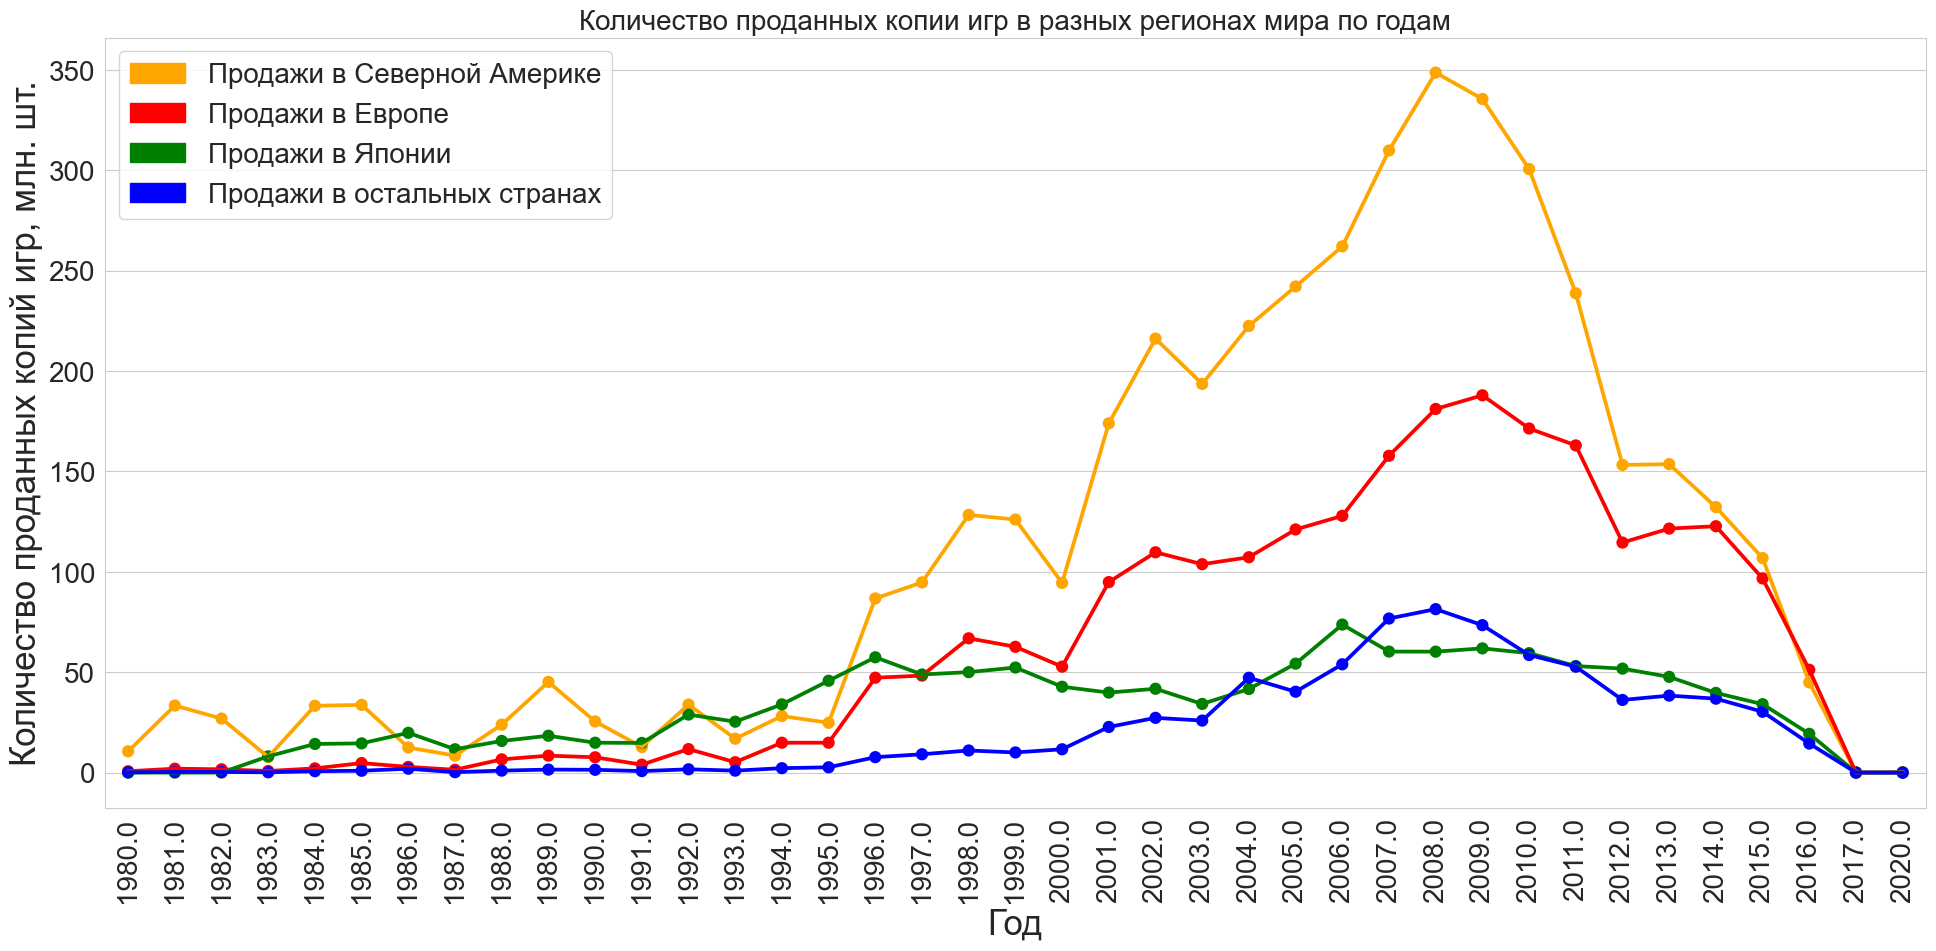

In [ ]:
sns.set_style("whitegrid")
fig=plt.figure(figsize=(23.5,10))
plt.xticks(rotation=90)
plt.title('Количество проданных копии игр в разных регионах мира по годам',fontdict={'fontsize':20})
sns.pointplot(x='Year_of_Release',y='NA_Sales',data=data.groupby(data['Year_of_Release'].sort_values()).sum().drop(['Year_of_Release'],axis=1).reset_index(),color='orange')
sns.pointplot(x='Year_of_Release',y='EU_Sales',data=data.groupby(data['Year_of_Release'].sort_values()).sum().drop(['Year_of_Release'],axis=1).reset_index(),color='red')
sns.pointplot(x='Year_of_Release',y='JP_Sales',data=data.groupby(data['Year_of_Release'].sort_values()).sum().drop(['Year_of_Release'],axis=1).reset_index(),color='green')
sns.pointplot(x='Year_of_Release',y='Other_Sales',data=data.groupby(data['Year_of_Release'].sort_values()).sum().drop(['Year_of_Release'],axis=1).reset_index(),color='blue')
plt.legend(handles=[mpatches.Patch(color='orange', label='Продажи в Северной Америке'),
                    mpatches.Patch(color='red', label='Продажи в Европе'),
                    mpatches.Patch(color='green', label='Продажи в Японии'),
                    mpatches.Patch(color='blue', label='Продажи в остальных странах')], loc='upper left', fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Количество проданных копий игр, млн. шт.', fontsize = 25)
plt.xlabel('Год', fontsize = 25)

C:\Users\v1d3k\AppData\Local\Temp\ipykernel_19832\1835130817.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(x='Platform',y='Global_Sales',data=data.groupby(data['Platform']).sum().Global_Sales.sort_values(ascending=False).reset_index(), palette=sns.cubehelix_palette((40), rot=-.2, reverse=True))


Text(0.5, 0, 'Платформа')

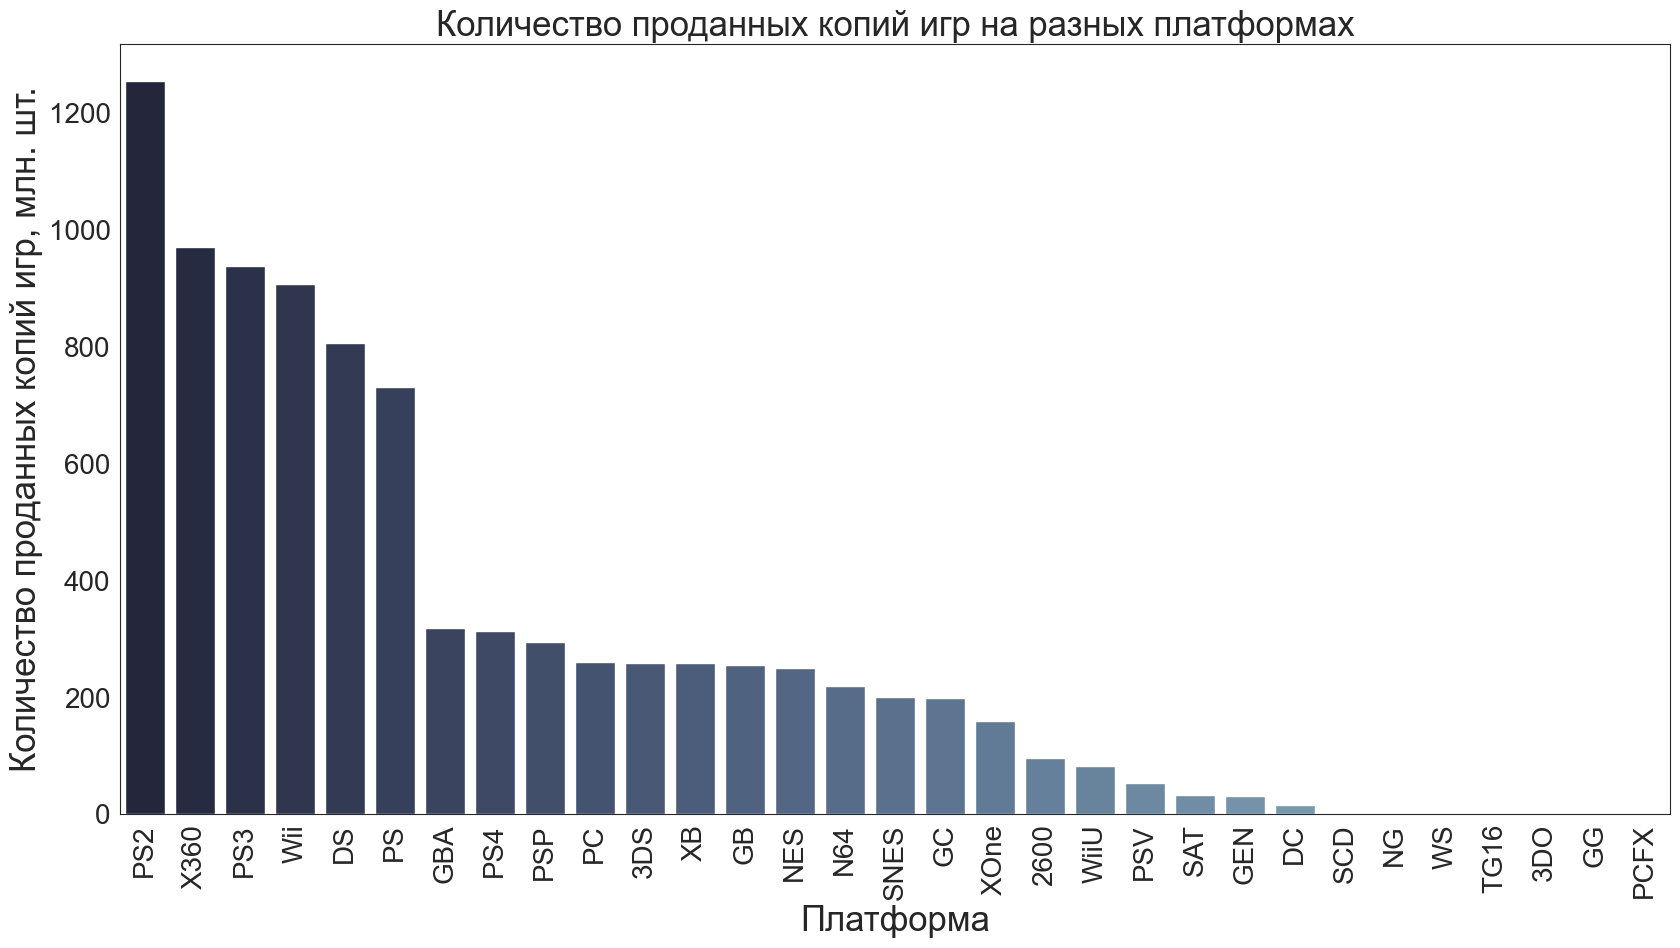

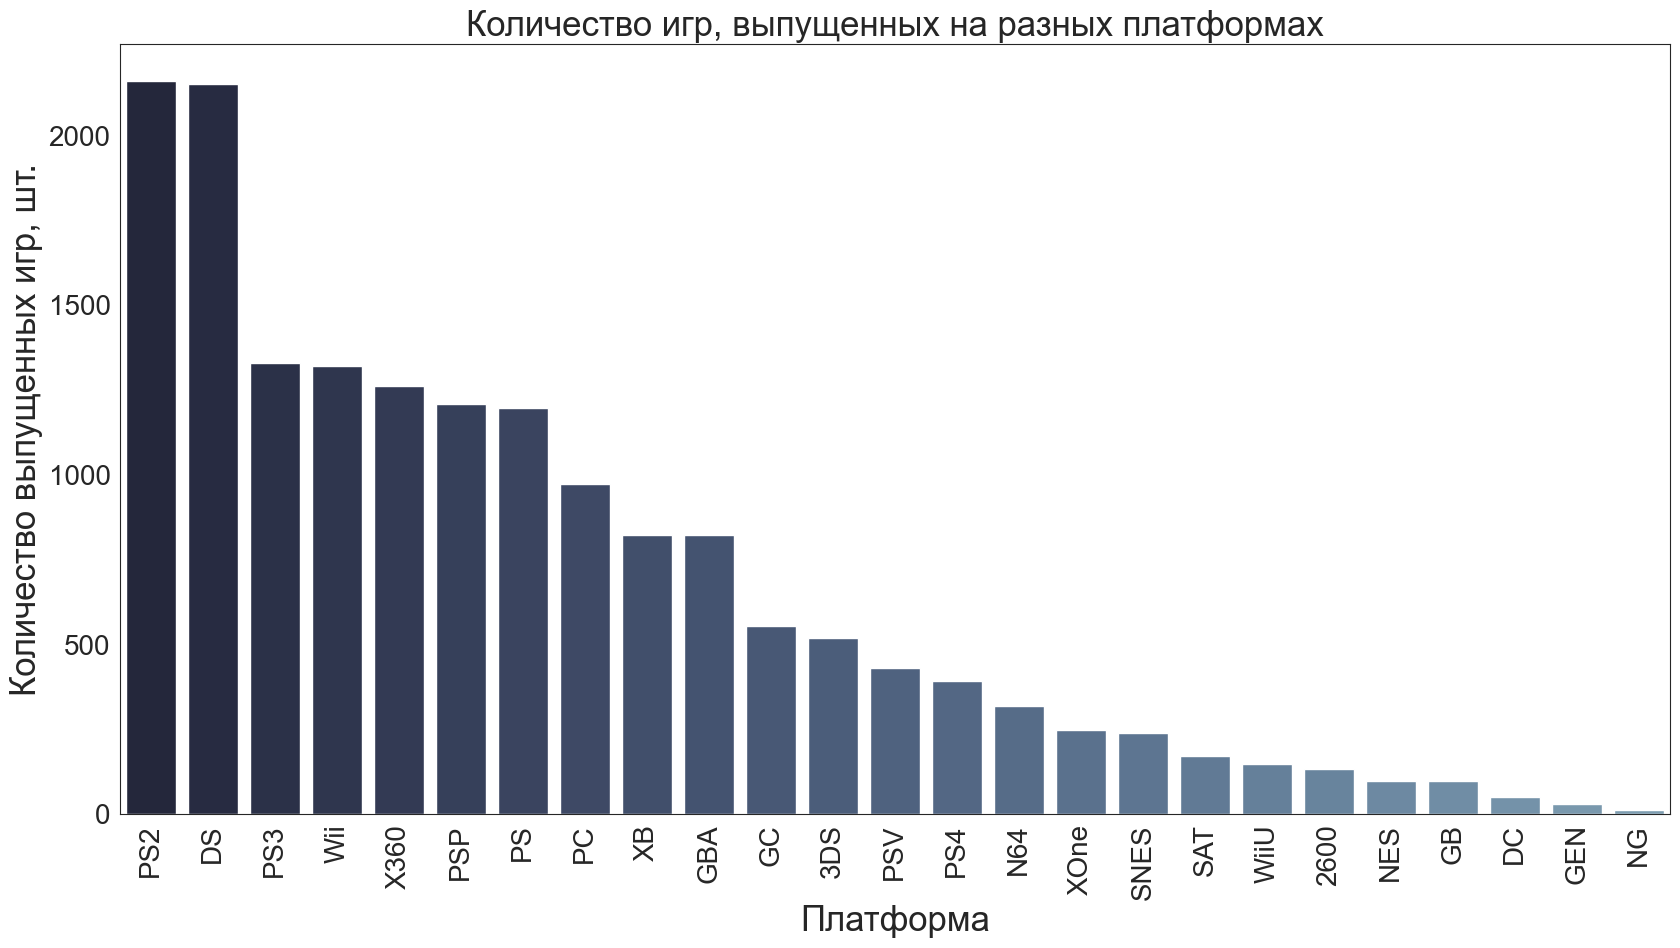

In [ ]:
sns.set_style("white")
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
plt.title('Количество проданных копий игр на разных платформах',fontdict={'fontsize':25})
sns.barplot(x='Platform',y='Global_Sales',data=data.groupby(data['Platform']).sum().Global_Sales.sort_values(ascending=False).reset_index(), palette=sns.cubehelix_palette((40), rot=-.2, reverse=True))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Количество проданных копий игр, млн. шт.', fontsize=25)
plt.xlabel('Платформа', fontsize=25)

sns.set_style("white")
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
plt.title('Количество игр, выпущенных на разных платформах',fontdict={'fontsize':25})
sns.barplot(x=data.Platform.value_counts()[data.Platform.value_counts()>10].index, y=data.Platform.value_counts()[data.Platform.value_counts()>10], palette=sns.cubehelix_palette((40), rot=-.2, reverse=True))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Количество выпущенных игр, шт.', fontsize=25)
plt.xlabel('Платформа', fontsize=25)

Text(0.5, 0, 'Платформа')

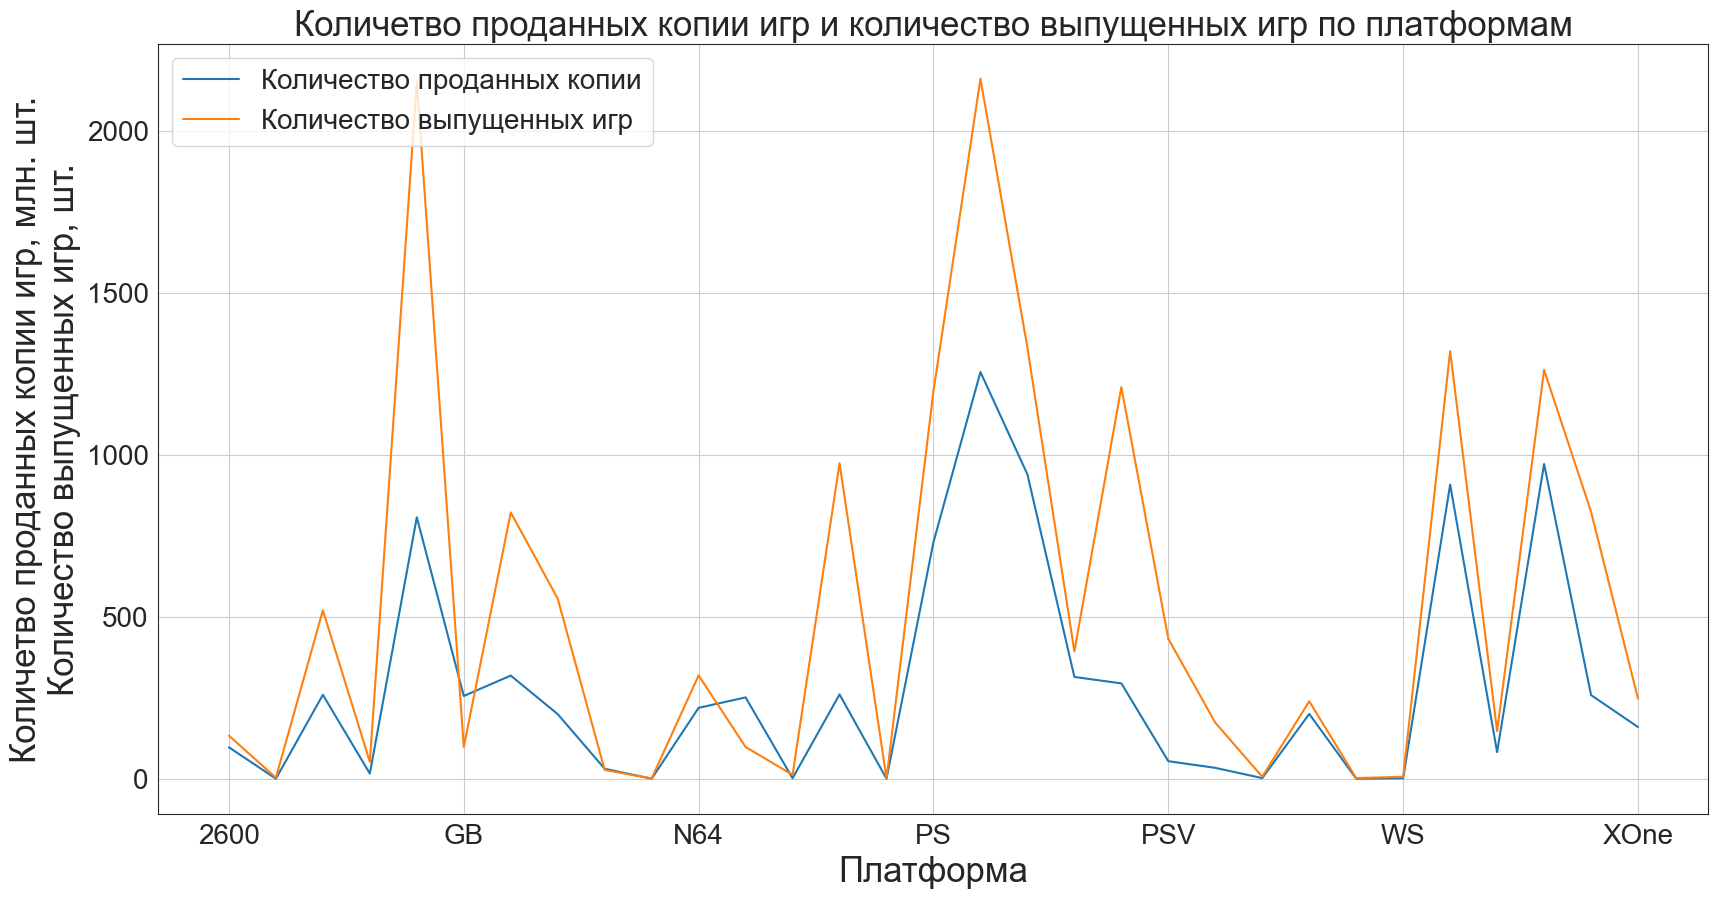

In [ ]:
plt.figure(figsize=(20, 10))
plt.title('Количетво проданных копии игр и количество выпущенных игр по платформам',fontdict={'fontsize':25})
data.groupby('Platform')['Global_Sales'].sum().plot(legend=True, label='Количество проданных копии').legend(loc=2, prop={'size': 20})
data.groupby('Platform')['Name'].count().plot(legend=True, grid=True, label='Количество выпущенных игр').legend(loc=2, prop={'size': 20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Количетво проданных копии игр, млн. шт.\nКоличество выпущенных игр, шт.', fontsize=25)
plt.xlabel('Платформа', fontsize=25)

C:\Users\v1d3k\AppData\Local\Temp\ipykernel_19832\1210104115.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(y='Platform',x='NA_Sales',data=data.groupby(data['Platform']).sum().NA_Sales.sort_values(ascending=False).reset_index()[:20],palette=sns.cubehelix_palette((40), rot=-.2, reverse=True))
C:\Users\v1d3k\AppData\Local\Temp\ipykernel_19832\1210104115.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(y='Platform',x='EU_Sales',data=data.groupby(data['Platform']).sum().EU_Sales.sort_values(ascending=False).reset_index()[:20],palette=sns.cubehelix_palette((40), rot=-.2, reverse=Tr

Text(0.5, 0, 'Количество проданных копий игр, млн. шт.')

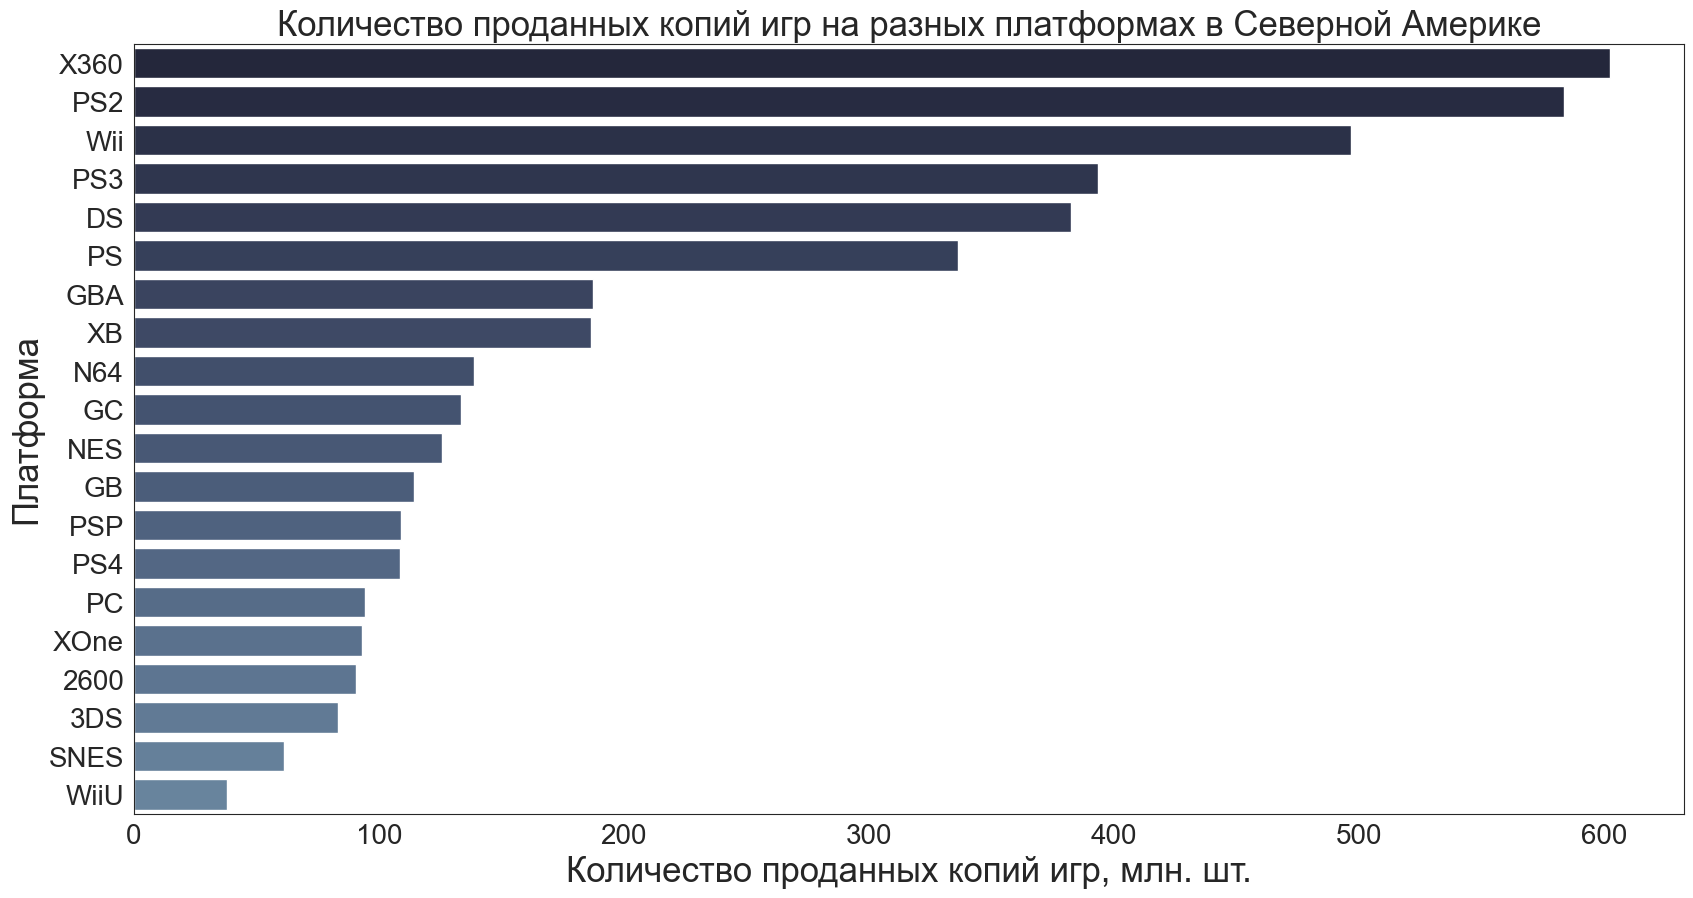

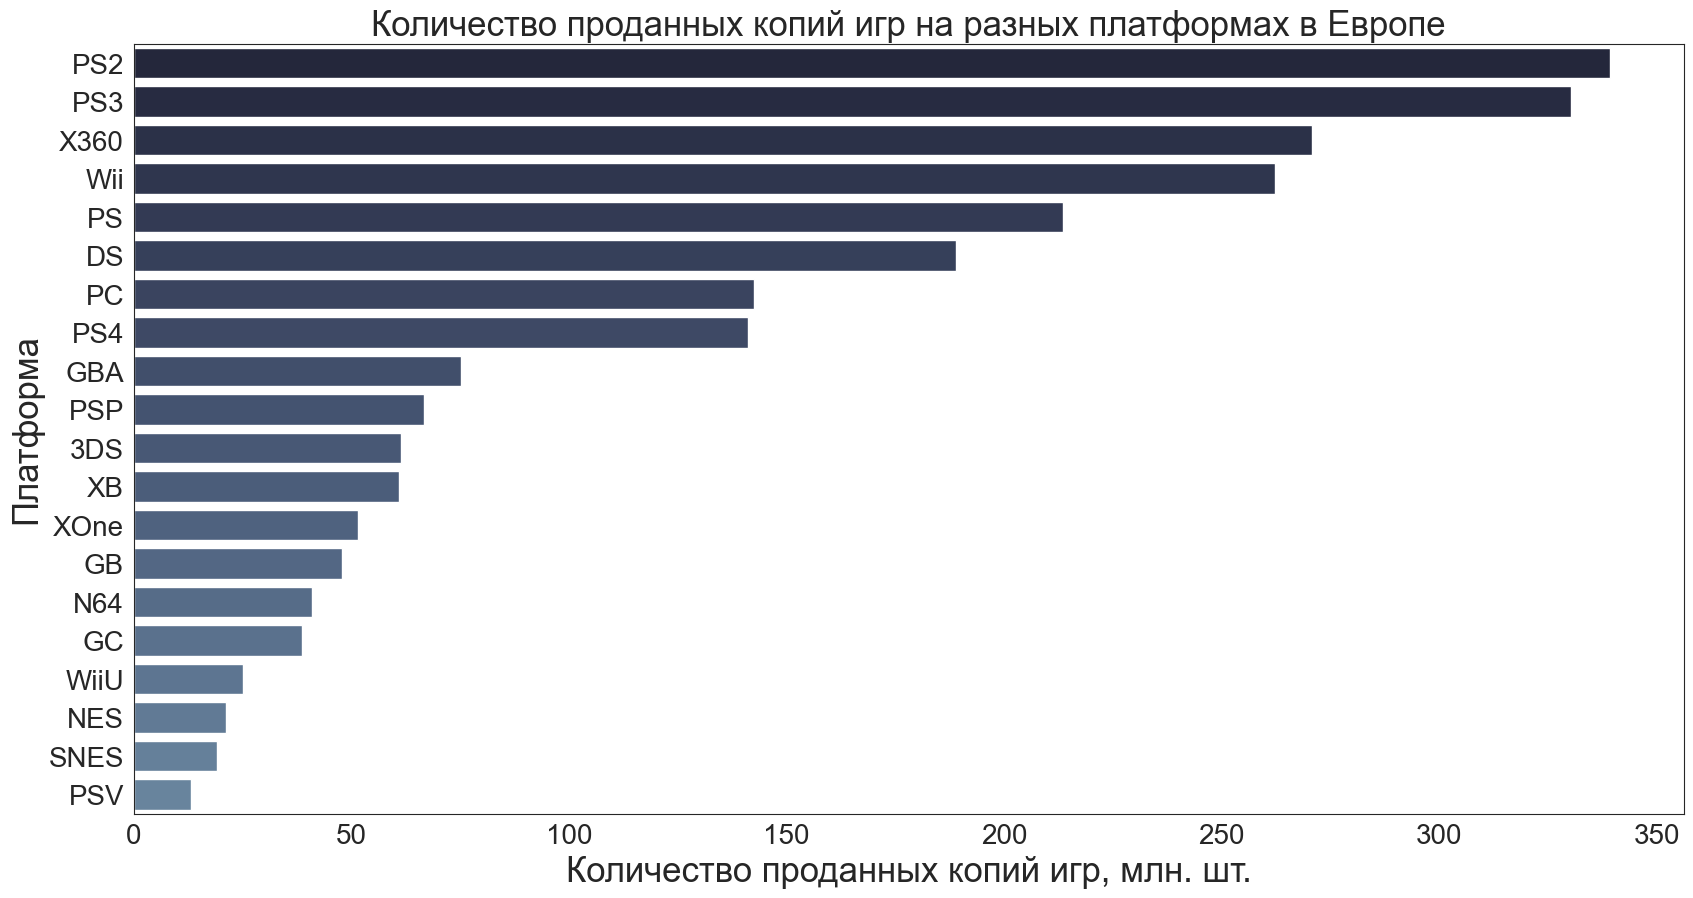

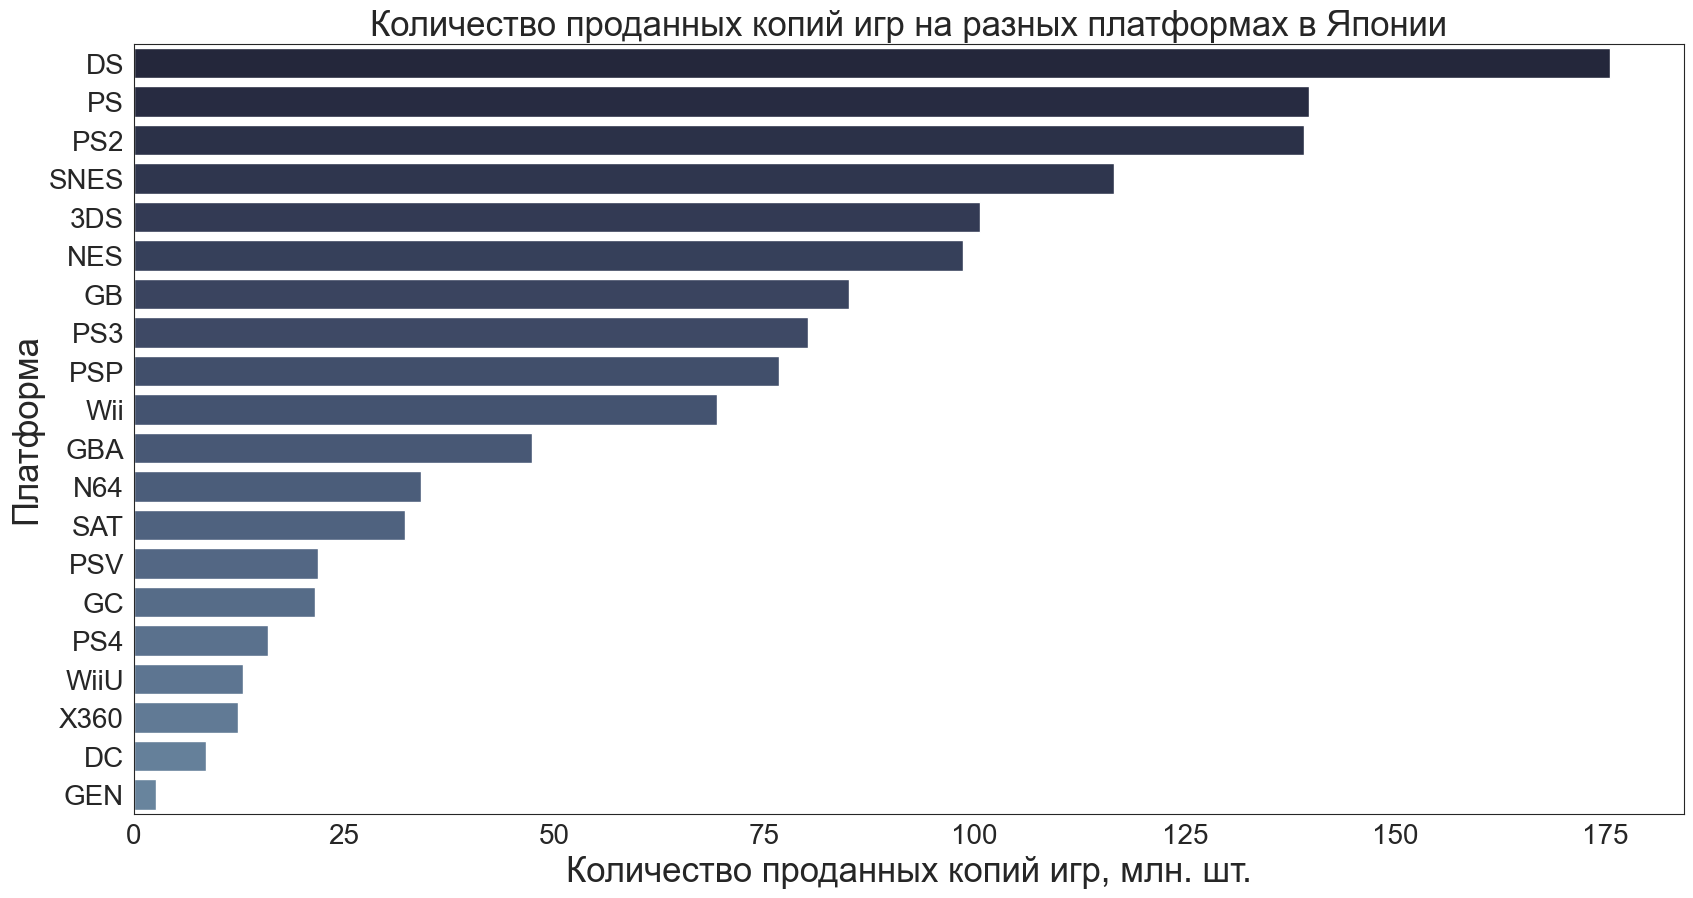

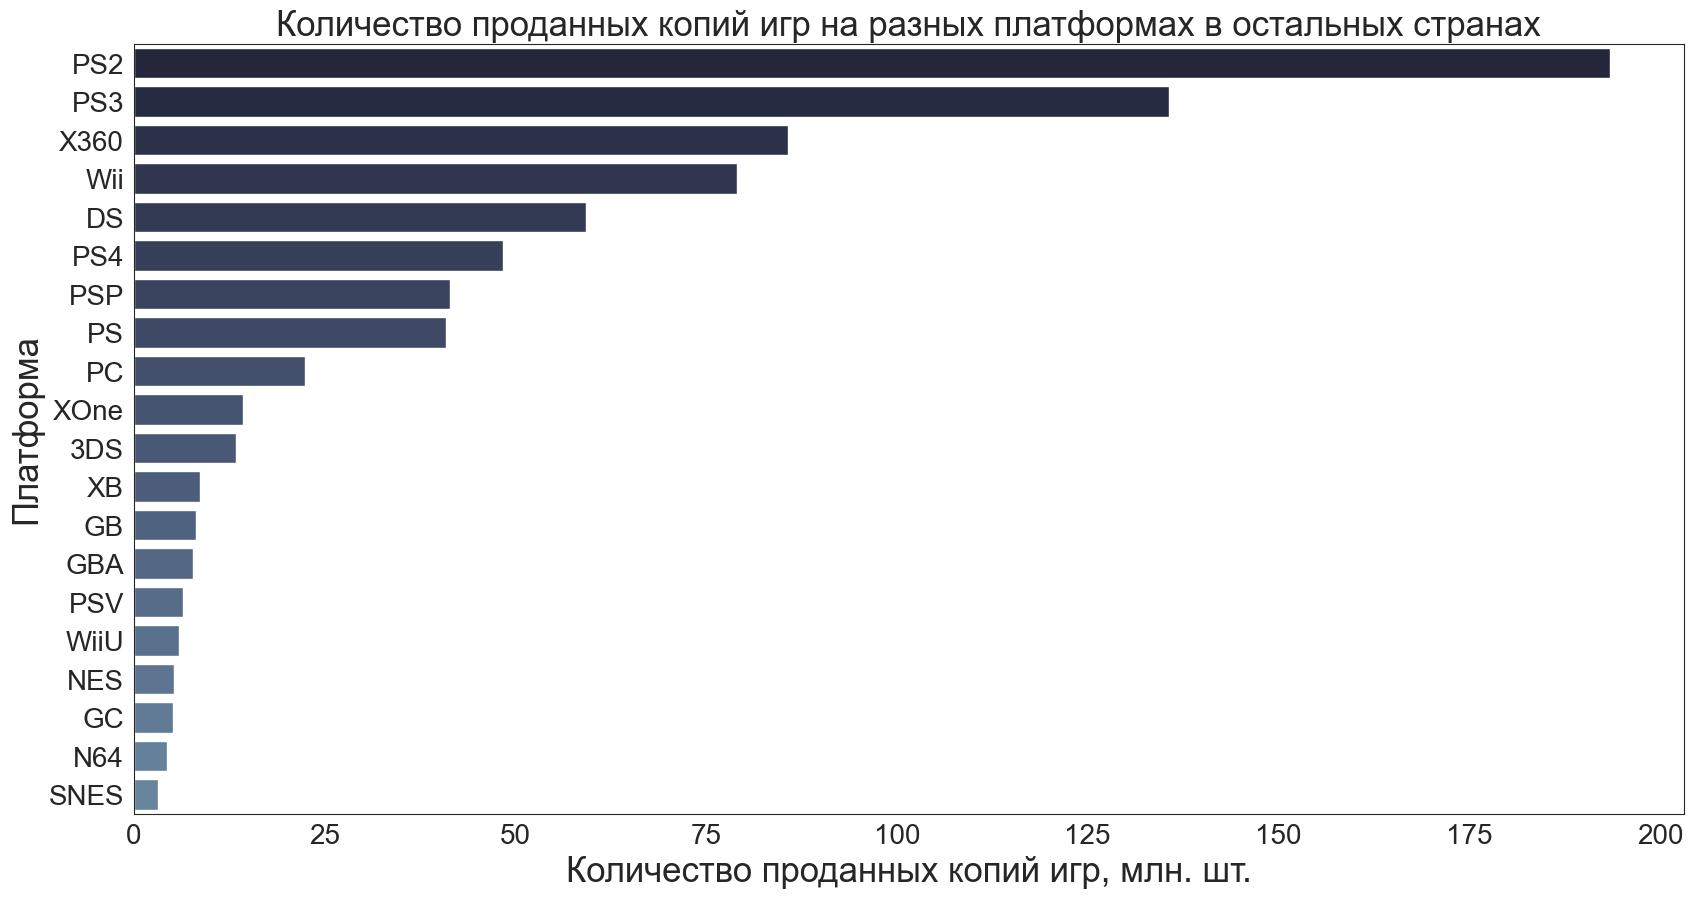

In [ ]:
sns.set_style("white")
plt.figure(figsize=(20, 10))
plt.title('Количество проданных копий игр на разных платформах в Северной Америке',fontdict={'fontsize':25})
sns.barplot(y='Platform',x='NA_Sales',data=data.groupby(data['Platform']).sum().NA_Sales.sort_values(ascending=False).reset_index()[:20],palette=sns.cubehelix_palette((40), rot=-.2, reverse=True))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Платформа', fontsize=25)
plt.xlabel('Количество проданных копий игр, млн. шт.', fontsize=25)

sns.set_style("white")
plt.figure(figsize=(20, 10))
plt.title('Количество проданных копий игр на разных платформах в Европе',fontdict={'fontsize':25})
sns.barplot(y='Platform',x='EU_Sales',data=data.groupby(data['Platform']).sum().EU_Sales.sort_values(ascending=False).reset_index()[:20],palette=sns.cubehelix_palette((40), rot=-.2, reverse=True))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Платформа', fontsize=25)
plt.xlabel('Количество проданных копий игр, млн. шт.', fontsize=25)

sns.set_style("white")
plt.figure(figsize=(20, 10))
plt.title('Количество проданных копий игр на разных платформах в Японии',fontdict={'fontsize':25})
sns.barplot(y='Platform',x='JP_Sales',data=data.groupby(data['Platform']).sum().JP_Sales.sort_values(ascending=False).reset_index()[:20],palette=sns.cubehelix_palette((40), rot=-.2, reverse=True))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Платформа', fontsize=25)
plt.xlabel('Количество проданных копий игр, млн. шт.', fontsize=25)

sns.set_style("white")
plt.figure(figsize=(20, 10))
plt.title('Количество проданных копий игр на разных платформах в остальных странах',fontdict={'fontsize':25})
sns.barplot(y='Platform',x='Other_Sales',data=data.groupby(data['Platform']).sum().Other_Sales.sort_values(ascending=False).reset_index()[:20],palette=sns.cubehelix_palette((40), rot=-.2, reverse=True))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Платформа', fontsize=25)
plt.xlabel('Количество проданных копий игр, млн. шт.', fontsize=25)

In [ ]:
sns.set_style("white")
plt.figure(figsize=(15, 15))
data = Counter(data['Platform'])
labels = data.keys()
sizes = data.groupby(data['Platform']).sum().EU_Sales.sort_values(ascending=False).reset_index()[:20]
plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Процент выпущенных на платформах игр', fontdict={'fontsize':25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

TypeError: 'int' object is not iterable

<Figure size 1500x1500 with 0 Axes>

In [ ]:
def donut_chart(column, palette="Set2"):
    values = column.values()
    labels = column.keys()
    plt.pie(values, colors=sns.color_palette(palette), 
            labels=labels, autopct="%1.1f%%", 
            startangle=90, pctdistance=0.85)
    #draw circle
    centre_circle = plt.Circle((0,0), 0.70, fc="white")
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

In [ ]:
donut_chart(data["Platform"])
plt.title("Platforms")
plt.axis("equal")

AttributeError: 'int' object has no attribute 'values'